In [1]:
%reset -f
%config Completer.use_jedi = True
# %matplotlib widget
# from scipy.stats import rankdata
# from sklearn.preprocessing import normalize
# import sklearn.utils as sku
# import plotly.graph_objects as go
# import plotly.express as px
# import chart_studio.plotly as py
# import chart_studio
# chart_studio.tools.set_credentials_file(username='dcolinmorgan', api_key='9FS3nO6nWYFq5zT6BRHD')
import plotly
import scipy
import warnings
warnings.filterwarnings('ignore')
##network stuff
from algorithmx import jupyter_canvas
import graph_tool.all as gt
from graph_tool import *
from graph_tool.all import *
from pylab import *

import algorithmx
import networkx as nx
import leidenalg as la
import igraph as ig
import community as community_louvain
import networkx.algorithms.community as nx_comm
from networkx.algorithms import bipartite
import graphistry
graphistry.register(api=3, username='dcolinmorgan', password='f5UwthGEF@F@xnP')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os,glob,sys,importlib,pickle,tqdm
from itertools import combinations,chain#,scipy,coolbox,pybedtools,
# from scipy.stats import linregress
# from scipy.ndimage import gaussian_filter
from tqdm import tqdm
from IPython.display import Image
import pandas as pd
import seaborn as sns
from scipy import stats
from pathlib import Path
# import pyvis
# from pyvis.network import Network
import networkit as nk
# from statannot import add_stat_annotation
from statannotations.Annotator import Annotator
# import biosppy
# from sklearn import metrics

os.chdir('/home/dcmorgan')
os.getcwd()

'/home/dcmorgan'

In [3]:
patt='all'
sys.path.insert(1, './run/gcn/')
import gcn_func
importlib.reload(sys.modules['gcn_func'])
from gcn_func import bip, load_list_of_dicts, meas, time_bar,proc_dat,rev_tbar,group_time_plot,time_order_net,build_gcn,structural_analysis
from gcn_func import pdize_net, plot_comm, load_list_of_dicts,igraph_from_pandas
# import mygene
# mg = mygene.MyGeneInfo()

from biothings_client import get_client
gene_client = get_client('gene')

sys.path.insert(1, './nestedness_analysis/')
import nestedness_metrics_other_functions
from nestedness_metrics_other_functions import from_edges_to_matrix
# importlib.reload(sys.modules['EO_functions_bipartite'])
import extremal_bi
sys.path.insert(1, './nestedness_analysis/network-generator/')
import generate_synthetic_networks
from netgen import NetworkGenerator

# bioinfo > net

In [ ]:
R0396MWT=pd.read_csv('hmp_subset_genefamilies-cpm.tsv',sep='\t',usecols=[0,1])
R0396MWT=R0396MWT[R0396MWT['R0003-CPK-DNA_Abundance-RPKs']!=0]

In [ ]:
# R0396MWT['gene']=R0396MWT['# Gene Family'].str.split('|').str[0].str.split('_').str[1].tolist()
# R0396MWT['spec']=R0396MWT['# Gene Family'].str.split('|').str[1].tolist()

# R0396MWT=R0396MWT[['spec','gene']]
# R0396MWT.spec=R0396MWT.spec.astype('str')


R0396MWTa=R0396MWT.loc[np.random.choice(R0396MWT.index, 5000, replace=False)]

In [ ]:
[len(np.unique(R0396MWTa['spec'])),
len(np.unique(R0396MWTa['gene'].astype('str')))]

In [ ]:
G=nx.from_pandas_edgelist(R0396MWTa, 'gene', 'spec', edge_attr=None, create_using=None)
# G = nx.Graph(source=['gene'],target=R0396MWT['spec'])

In [ ]:
from networkx.algorithms import bipartite
# G = nx.path_graph(4)
print(bipartite.is_bipartite(G))
# is_bipartite(G)

In [ ]:
g = nk.generators.HyperbolicGenerator(1e5).generate()
communities = nk.community.detectCommunities(g, inspect=True)

In [ ]:
%%bash
pat=R0396-MWT
awk '($3>90)' run/gcn/pat/"$pat"_proteins_o2 > "$pat"_nko
cut -f2 "$pat"_nko |cut -d "|" -f 1|cut -d "_" -f 2 > "$pat"_tmpA
cut -f2 "$pat"_nko |cut -d "|" -f 2 > "$pat"_tmpB
cut -f3 "$pat"_nko >"$pat"_tmpC
pr -mt -s, "$pat"_tmpB "$pat"_tmpA "$pat"_tmpC >"$pat"_nk
# awk '($3>90)' "$pat"_tmpD >"$pat"_nk
rm *tmp*

In [ ]:
reader = nk.graphio.EdgeListReader(',',1,'#',directed=False,continuous=False)
G = reader.read('R0396-MWT_nk')
map = reader.getNodeMap()


In [ ]:
dd = sorted(nk.centrality.DegreeCentrality(G).run().scores(), reverse=True)
plt.xscale("log")
plt.xlabel("degree")
plt.yscale("log")
plt.ylabel("number of nodes")
plt.plot(dd)
plt.show()

In [ ]:
nk.profiling.Profile.create(G).output('pdf','tmp')

In [ ]:
plmCommunities = nk.community.detectCommunities(G, algo=nk.community.PLM(G, True))

In [ ]:
print("{0} elements assigned to {1} subsets".format(plmCommunities.numberOfElements(),
plmCommunities.numberOfSubsets()))
nk.community.writeCommunities(plmCommunities, "tmp/communtiesPLM.partition")

In [ ]:
sizes = communities.subsetSizes()
sizes.sort(reverse=True)
ax1 = plt.subplot(2,1,1)
ax1.set_ylabel("size")
ax1.plot(sizes)

ax2 = plt.subplot(2,1,2)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylabel("size")
ax2.plot(sizes)
plt.show()

In [ ]:
coreDec = nk.centrality.CoreDecomposition(g)
coreDec.run()
nk.viztasks.drawGraph(g, node_size=[(k**2)*20 for k in coreDec.scores()])
plt.show()

# pheno

In [ ]:
primary=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='Primary Data')
diet=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='Diet Data')
blood_stool=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='blood and stool biomarkers')
secondary=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='Secondary Data')
MRI=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='MRI scores')

In [ ]:
uni_bact=primary[['Age','Hypertension Category by 24h BP w/o considering antihypertensive med']]
uni_bact=uni_bact.rename(columns={"Hypertension Category by 24h BP w/o considering antihypertensive med": "HT"})
# uni_bact.to_csv('data/gcn/uni_bact.txt',sep='\t')

# build networks

In [ ]:
# %%bash ARG
# humann_join_tables -i /groups/cgsd/gordonq/LeungWK_Metagenomics_SS-190611-01a/humann3 -o arg_subset_genefamilies.tsv --file_name genefamilies
# humann_renorm_table -i arg_subset_genefamilies.tsv -o arg_subset_genefamilies-cpm.tsv --units cpm

In [ ]:
# build_gcn('arg_subset_genefamilies-cpm.tsv','ARG')

In [ ]:
# %%bash ##CRC
# humann_join_tables -i /groups/cgsd/gordonq/CPOS_Data*/LeungSY_Metagenomics_CPOS-*/humann3 -o crc_subset_genefamilies.tsv --file_name genefamilies
# humann_renorm_table -i crc_subset_genefamilies.tsv -o crc_subset_genefamilies-cpm.tsv --units cpm

In [ ]:
# relab=pd.read_csv('../../groups/cgsd/gordonq/all_hypertension/342_K2_contigsum.csv')
# relab[['p', 'c','o','f','g','s']]=pd.DataFrame(relab["Unnamed: 0"].str.split(';', expand=True).values,
#              columns=['p', 'c','o','f','g','s'])
# del relab["Unnamed: 0"]
# relgene=pd.read_csv('/groups/cgsd/gordonq/LauG_Metagenomics_CPOS-200710-CJX-3455a/50_genefamilies.tsv',sep='\t')
# relgene=pd.read_csv('50_genefamilies-cpm.tsv')
relgene=pd.read_csv('all_arg_subset_genefamilies-cpm.tsv',sep='\t')
# relgene=pd.read_csv('hmp_subset_genefamilies-cpm.tsv',sep='\t',nrows=100)
# relgene=pd.read_csv('',sep='\t')
relgene['gene']=relgene['# Gene Family'].str.split('|').str[0]
relgene=relgene[relgene['gene']!='UniRef90_unknown']
relgene=relgene[relgene['gene']!='UNMAPPED']
relgene.index=relgene['# Gene Family']
del relgene['gene'], relgene['# Gene Family']
# relgene=relgene/relgene.sum(axis=0)

# relgene=relgene/relgene.sum(axis=0)
relgene['gen']=relgene.index.str.split('|').str[1].str.split('.').str[0].tolist()
relgene['spec']=relgene.index.str.split('.').str[1]#.str.split('.').str[0].tolist()
relgene['spec'].replace('_',' ')
relgene.index=relgene.index.str.split('|').str[0]
relgene=relgene.dropna()
# del relgene['# Gene Family']


In [ ]:
cc=relgene.groupby(['# Gene Family','spec']).sum()
# dd=relgene.groupby(['# Gene Family','gen']).sum()
cc=cc.reset_index()
# dd=dd.reset_index()
cc=cc.rename(columns={'# Gene Family':'gene'})#,'spec':0,'gene':1})

dd=cc[['gene','spec',net]]
dd=dd[dd[net]!=0]

check instrucitons [from here](https://stackoverflow.com/questions/23975773/how-to-compare-directed-graphs-in-networkx#54677502)
and [here](https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition)

In [ ]:
dd=cc[['spec','gene',net]]
dd=dd[dd[net]!=0]

B = nx.Graph()
dd=dd[dd['source'].str.contains('s__')]
dd=dd[dd['target'].str.contains('UniRef')]
B.add_nodes_from(dd['spec'], bipartite=0)
B.add_nodes_from(dd['gene'], bipartite=1)
B.add_edges_from(tuple(dd[['spec','gene']].itertuples(index=False, name=None)))
remove = [node for node,degree in dict(B.degree()).items() if degree <5]
B.remove_nodes_from(remove)
C.append(B)

In [ ]:
from networkx.algorithms import bipartite
ff=[]
C=[]
for i,net in enumerate(relgene.columns[1:4]):
    # pd.read_csv()
    # dd=cc[['spec','gene',net]]
    # dd=dd[dd[net]!=0]
    # ee=nx.from_pandas_edgelist(dd,source='spec',target='gene',edge_attr=net)
    # remove = [node for node,degree in dict(ee.degree()).items() if degree <5]
    # ee.remove_nodes_from(remove)
    # ff.append(ee)
    
    B = nx.Graph()
    dd=dd[dd['source'].str.contains('s__')]
    dd=dd[dd['target'].str.contains('UniRef')]
    B.add_nodes_from(dd['spec'], bipartite=0)
    B.add_nodes_from(dd['gene'], bipartite=1)
    B.add_edges_from(tuple(dd[['spec','gene']].itertuples(index=False, name=None)))
    remove = [node for node,degree in dict(B.degree()).items() if degree <5]
    B.remove_nodes_from(remove)
    C.append(B)

# with open('data/gcn/NX_Emore_ARG.pkl', 'wb') as f:
#     pickle.dump(ff, f)
with open('data/gcn/BXX_Emore_ARG.pkl', 'wb') as f:
    pickle.dump(C, f)

In [ ]:
graphs = load_list_of_dicts('data/gcn/BX_Emore_ARG.pkl')
len(graphs[12].edges())
# B=graphs[3]
# remove = [node for node,degree in dict(B.degree()).items() if degree <2]
# B.remove_nodes_from(remove)
# len(B.edges)

In [ ]:
measur=eval('nx.degree_centrality')
tmp=plt.hist(measur(graphs[1]),bins=20)
tmp=plt.hist(measur(graphs[0]),bins=20,alpha=.5)

In [ ]:
HT50=uni_bact[uni_bact.index.isin(relgene.columns[:-2].str.split('-').str[0])]
HT50['index']=np.arange(len(HT50))
S = [nx.clustering(graphs[i]) for i in HT50[HT50['HT']==0]['index'].values]
T = [nx.clustering(graphs[i]) for i in HT50[HT50['HT']!=0]['index'].values]

In [ ]:
non=pd.DataFrame(S).melt()
non['type']='NoHT'
non.dropna(inplace=True)
non=non[non.value!=0]
non=non[~non['variable'].str.contains('UniRef90')]
non.value=non.value/np.sum(non.value)
yes=pd.DataFrame(T).melt()
yes['type']='HT'
yes.dropna(inplace=True)
yes=yes[yes.value!=0]
yes=yes[~yes['variable'].str.contains('UniRef90')]
yes.value=yes.value/np.sum(yes.value)
df=non.append(yes)
# df=df.dropna()
df['gen']=df.variable.str.split('_').str[2]

In [ ]:
[sum(non.value),sum(yes.value)]

In [ ]:
tmp=plt.hist(non.value,log=True,bins=100)
tmp=plt.hist(yes.value,log=True,bins=100,alpha=.5)

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
# rs = np.random.RandomState(1979)
# x = rs.randn(500)
# g = np.tile(list("ABCDEFGHIJ"), 50)
# df = pd.DataFrame(dict(x=x, g=g))
# m = df.g.map(ord)
# df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df[df['type']=='HT'], row="gen", hue="gen", aspect=20, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "value",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "value", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "value")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.savefig("data/gcn/degree_centrality_HT.png",dpi=300,bbox_inches = "tight")


In [ ]:
relgene=pd.read_csv('hmp_subset_genefamilies-cpm.tsv',sep='\t')

relgene['gene']=relgene['# Gene Family'].str.split('|').str[0]
relgene=relgene[relgene['gene']!='UniRef90_unknown']
relgene=relgene[relgene['gene']!='UNMAPPED']
relgene.index=relgene['# Gene Family']
del relgene['gene'], relgene['# Gene Family']
# relgene=relgene/relgene.sum(axis=0)
relgene=relgene/relgene.sum(axis=0)
relgene['gen']=relgene.index.str.split('|').str[1].str.split('.').str[0].tolist()
relgene['spec']=relgene.index.str.split('.').str[1]#.str.split('.').str[0].tolist()
relgene['spec'].replace('_',' ')
relgene.index=relgene.index.str.split('|').str[0]
relgene=relgene.dropna()


cc=relgene.groupby(['# Gene Family','spec']).sum()
# dd=relgene.groupby(['# Gene Family','gen']).sum()
cc=cc.reset_index()
# dd=dd.reset_index()
cc=cc.rename(columns={'# Gene Family':'gene'})#,'spec':0,'gene':1})


primary=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='Primary Data')
uni_bact=primary[['Age','Hypertension Category by 24h BP w/o considering antihypertensive med']]
uni_bact=uni_bact.rename(columns={"Hypertension Category by 24h BP w/o considering antihypertensive med": "HT"})


# analyze HT nets

In [ ]:
patt='all'
sys.path.insert(1, './run/gcn/')
import gcn_func
importlib.reload(sys.modules['gcn_func'])
from gcn_func import bip, load_list_of_dicts, meas, time_bar,proc_dat,rev_tbar,group_time_plot,time_order_net,build_gcn#plotRidge,LayeredNetworkGraph,plot_sankey

# relgene=pd.read_csv('data/gcn/relgene_all.txt',sep='\t')
graphs = load_list_of_dicts('data/gcn/BX_'+patt+'_HT.pkl')
HTXX=uni_bact[uni_bact.index.isin(relgene.columns[1:-2].str.split('-').str[0])]
HTXX['index']=np.arange(len(HTXX))


In [ ]:
# for i,net in tqdm.tqdm(enumerate(BX_graphs)):
for i,net in tqdm(enumerate(HTXX[HTXX['HT']!=5]['index'].values)):
  cc=nx.convert_matrix.to_pandas_edgelist(graphs[i])
  # cc['weight']=np.random.randn(len(cc))
  rrr=str(HTXX[HTXX['index']==i]['Age'].item())+'_'+str(HTXX[HTXX['index']==i]['HT'].item())#+'_'+str(HTXX[HTXX['index']==i]['sex'].item())
  cc.rename(columns={cc.columns[2]:rrr},inplace=True)
  if i==0:
    dd=cc
  else:
    dd=dd.merge(cc,on=['source','target'],how='outer')
# dd.dropna(how='any')

In [ ]:
dd.set_index(['source', 'target'], inplace=True) #>> run only first time editing dd
# dd = dd/np.max(dd,axis=0)
# dd=dd/np.sum(dd,axis=0) ###tried to do things strangely
### dd=np.argsort(dd)
noHT=dd.filter(regex='_0_').dropna(how='all')
HT1=dd.filter(regex='_1_')#.dropna(how='all')
HT2=dd.filter(regex='_2_')#.dropna(how='all')
HT=HT1.merge(HT2,right_index=True,left_index=True).dropna(how='all')
# [noHT.shape,HT1.shape,HT2.shape]
[noHT.shape,HT.shape]

## case v control nets

In [ ]:
ccc=pd.DataFrame(noHT.sum(axis=1)).reset_index()
g=nx.from_pandas_edgelist(ccc,source='source',target='target',edge_attr=0)
C = nx.Graph()
C.add_nodes_from(ccc['source'], bipartite=0)
C.add_nodes_from(ccc['target'], bipartite=1)
C.add_weighted_edges_from(tuple(ccc[['source','target',0]].itertuples(index=False, name=None)))

ddd=pd.DataFrame(HT.sum(axis=1)).reset_index()
g=nx.from_pandas_edgelist(ddd,source='source',target='target',edge_attr=0)
B = nx.Graph()
B.add_nodes_from(ccc['source'], bipartite=0)
B.add_nodes_from(ccc['target'], bipartite=1)
B.add_weighted_edges_from(tuple(ccc[['source','target',0]].itertuples(index=False, name=None)))

pd.DataFrame(nx.degree_histogram(B))
pd.DataFrame(nx.degree_histogram(C))

tmp=plt.hist(nx.degree_histogram(C),log=True,bins=10)

tmp=plt.hist(nx.degree_histogram(B),log=True,bins=10)

In [ ]:
ccc=pd.DataFrame(noHT.sum(axis=1)).reset_index()
# ccc=ccc[ccc[0]>10**-2].dropna()#percentage cutoff
ccc=ccc[ccc[0]>10].dropna()
# g=nx.from_pandas_edgelist(ccc,source='source',target='target',edge_attr=0)
C = nx.Graph()
C.add_nodes_from(ccc['source'], bipartite=0)
C.add_nodes_from(ccc['target'], bipartite=1)
C.add_weighted_edges_from(tuple(ccc[['source','target',0]].itertuples(index=False, name=None)))

ddd=pd.DataFrame(HT.sum(axis=1)).reset_index()
# ddd=ddd[ddd[0]>10**-2].dropna()
ddd=ddd[ddd[0]>10].dropna()
# g=nx.from_pandas_edgelist(ddd,source='source',target='target',edge_attr=0)
B = nx.Graph()
B.add_nodes_from(ddd['source'], bipartite=0)
B.add_nodes_from(ddd['target'], bipartite=1)
B.add_weighted_edges_from(tuple(ddd[['source','target',0]].itertuples(index=False, name=None)))


In [ ]:
g = graphistry.edges(ddd, 'source', 'target','value')
g.plot()

In [ ]:
g = graphistry.edges(ccc, 'source', 'target','value')
g.plot()

## bin & time steps

In [ ]:
noHT=dd.filter(regex='_0_').dropna(how='all')
HT1=dd.filter(regex='_1_')#.dropna(how='all')
HT2=dd.filter(regex='_2_')#.dropna(how='all')
HT=HT1.merge(HT2,right_index=True,left_index=True).dropna(how='all')
[noHT.shape,HT.shape]

noHT.columns=noHT.columns.str.split('_').str[0]
noHT=noHT.groupby(by=noHT.columns, axis=1).mean()
noHT=noHT.dropna(how='any')
noHT.reset_index(inplace=True)
jj=noHT.melt(['source','target'])
jj.rename(columns={'variable':'time'},inplace=True)
jj['t']=jj['time']
jj['species']=jj['source'].str.split('_').str[2]
jj=jj.dropna(how='any')
sns.lineplot(data=jj[jj['target']=='UniRef90_T4BVE4'], x="t", y="value", hue="species")


In [ ]:
noHT=dd.filter(regex='_0_').dropna(how='all')
HT1=dd.filter(regex='_1_')#.dropna(how='all')
HT2=dd.filter(regex='_2_')#.dropna(how='all')
HT=HT1.merge(HT2,right_index=True,left_index=True).dropna(how='all')
[noHT.shape,HT.shape]

noHT.columns=noHT.columns.str.split('_').str[0]
noHT=noHT.groupby(by=noHT.columns, axis=1).mean()
noHT=noHT.dropna(how='any')
noHT.columns=pd.qcut((noHT.columns).astype('int'), 10, labels=False)
noHT=noHT.groupby(by=noHT.columns, axis=1).mean()
noHT.reset_index(inplace=True)
jj=noHT.melt(['source','target'])
jj.rename(columns={'variable':'time'},inplace=True)
jj['t']=jj['time']
jj['species']=jj['source'].str.split('_').str[2]
jj=jj.dropna(how='any')
sns.lineplot(data=jj[jj['target']=='UniRef90_T4BVE4'], x="t", y="value", hue="source")


In [ ]:
noHT=dd.filter(regex='_0_').dropna(how='all')
HT1=dd.filter(regex='_1_')#.dropna(how='all')
HT2=dd.filter(regex='_2_')#.dropna(how='all')
HT=HT1.merge(HT2,right_index=True,left_index=True).dropna(how='all')
[noHT.shape,HT.shape]

noHT.columns=noHT.columns.str.split('_').str[0]
noHT=noHT.groupby(by=noHT.columns, axis=1).mean()
noHT=noHT.dropna(how='any')
noHT.columns=pd.qcut((noHT.columns).astype('int'), 5, labels=False)
noHT=noHT.groupby(by=noHT.columns, axis=1).mean()
noHT.reset_index(inplace=True)
jj=noHT.melt(['source','target'])
jj.rename(columns={'variable':'time'},inplace=True)
jj['t']=jj['time']
jj['species']=jj['source'].str.split('_').str[2]
jj=jj.dropna(how='any')
sns.lineplot(data=jj[jj['target']=='UniRef90_T4BVE4'], x="t", y="value", hue="source")


In [ ]:
noHT=dd.filter(regex='_0_').dropna(how='all')
HT1=dd.filter(regex='_1_')#.dropna(how='all')
HT2=dd.filter(regex='_2_')#.dropna(how='all')
HT=HT1.merge(HT2,right_index=True,left_index=True).dropna(how='all')

TU,TD,noHTT,HTT=time_order_net(noHT,HT,10**-6,'target',5,1,'mean')
TU.reset_index(inplace=True)
TD.reset_index(inplace=True)
[TU.shape,TD.shape]

In [ ]:
noHT=dd.filter(regex='_0_').dropna(how='all')
HT1=dd.filter(regex='_1_')#.dropna(how='all')
HT2=dd.filter(regex='_2_')#.dropna(how='all')
HT=HT1.merge(HT2,right_index=True,left_index=True).dropna(how='all')

LU,LD,noHDL,HTL=time_order_net(noHT,HT,10**-6,['source','target'],5,1,'median')
LU.reset_index(inplace=True)
LD.reset_index(inplace=True)
[LU.shape,LD.shape]

In [ ]:
# try to see which species are causing flux in protein content
# np.unique(noHTT[noHTT['target'].isin(LU[~LU['target'].isin(TU.index)]['target'])]['source'])

In [ ]:
LinkUP=LU[LU['target'].isin(LD['target'])]#['source']

In [ ]:
LinkDN=LD[LD['target'].isin(LU['target'])]#['source']

In [ ]:
JEFF=LinkUP.append(LinkDN)#
JEFF[5]=JEFF[4]-JEFF[0]

In [ ]:
JEFF

In [ ]:
ax = sns.barplot(x="target", y=5, hue="source", data=JEFF[JEFF['target']=='UniRef90_T4BVE4'])

In [ ]:
TU[(TU['target']=='UniRef90_T4BVE4')&(TU['target']=='UniRef90_D4IN85')&(TU['target']=='UniRef90_Q97TA2')&(TU['target']=='UniRef90_P0C0G7')]
TD[(TD['target']=='UniRef90_T4BVE4')&(TD['target']=='UniRef90_D4IN85')&(TD['target']=='UniRef90_Q97TA2')&(TD['target']=='UniRef90_P0C0G7')]

## networkx stuff

In [ ]:
g=nx.from_pandas_edgelist(noHT[noHT[0]>10**-6].dropna(),source='source',target='target',edge_attr=0)
h=nx.from_pandas_edgelist(noHT[noHT[1]>10**-6].dropna(),source='source',target='target',edge_attr=1)
i=nx.from_pandas_edgelist(noHT[noHT[2]>10**-6].dropna(),source='source',target='target',edge_attr=2)
j=nx.from_pandas_edgelist(noHT[noHT[3]>10**-6].dropna(),source='source',target='target',edge_attr=3)
k=nx.from_pandas_edgelist(noHT[noHT[4]>10**-6].dropna(),source='source',target='target',edge_attr=4)
l=nx.from_pandas_edgelist(noHT[noHT[5]>10**-6].dropna(),source='source',target='target',edge_attr=5)
m=nx.from_pandas_edgelist(noHT[noHT[6]>10**-6].dropna(),source='source',target='target',edge_attr=6)

gg=nx.from_pandas_edgelist(HT[HT[0]>10**-6].dropna(),source='source',target='target',edge_attr=0)
hh=nx.from_pandas_edgelist(HT[HT[1]>10**-6].dropna(),source='source',target='target',edge_attr=1)
ii=nx.from_pandas_edgelist(HT[HT[2]>10**-6].dropna(),source='source',target='target',edge_attr=2)
jj=nx.from_pandas_edgelist(HT[HT[3]>10**-6].dropna(),source='source',target='target',edge_attr=3)
kk=nx.from_pandas_edgelist(HT[HT[4]>10**-6].dropna(),source='source',target='target',edge_attr=4)
ll=nx.from_pandas_edgelist(HT[HT[5]>10**-6].dropna(),source='source',target='target',edge_attr=5)
mm=nx.from_pandas_edgelist(HT[HT[6]>10**-6].dropna(),source='source',target='target',edge_attr=6)

In [ ]:
fig=plt.figure(figsize=(5,15))
ax = fig.add_subplot(projection='3d')
LayeredNetworkGraph([g, h, i,j,k,l,m], ax=ax, layout=nx.spring_layout)
ax.set_axis_off()
# ax.figsize(5,15)
# plt.show()
fig.set_size_inches(20, 20)
fig.savefig('noHT.png', dpi=100)

In [ ]:
fig=plt.figure(figsize=(5,15))
ax = fig.add_subplot(projection='3d')
LayeredNetworkGraph([g, h, i,j,k,l,m], ax=ax, layout=nx.spring_layout)
ax.set_axis_off()
# ax.figsize(5,15)
# plt.show()
fig.set_size_inches(20, 20)
fig.savefig('HT.png', dpi=100)

## 7 groups histograms

In [ ]:
cc

In [ ]:
cc=HT.merge(pd.DataFrame(aa),right_index=True,left_index=True)
# cc.rename(columns={'0_x':'0','0_y':'all'},inplace=True)
cc=cc.melt(['source','target'])
plt.figure(figsize=(15,5))
sns.histplot(data=cc, x="value", hue="variable", log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False)
    

In [ ]:
sns.histplot(data=cc, x="value", log_scale=True, element="step", fill=False,hue='variable')


In [ ]:
dd=noHT.merge(pd.DataFrame(aa),right_index=True,left_index=True)
# cc.rename(columns={'0_x':'0','0_y':'all'},inplace=True)
dd=dd.melt(['source','target'])
plt.figure(figsize=(15,5))
sns.histplot(
    data=cc, x="value", hue="variable",
    # hue_order=["Radial Velocity", "Transit"],
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)

In [ ]:
sns.histplot(data=dd, x="value", log_scale=True, element="step", fill=False,hue='variable')


In [ ]:
# tmp=plt.hist(HT.melt().value.dropna(how='all'),bins=100,log=True)
tmp=plt.hist(bb.values,bins=100,log=True)
tmp=plt.hist(aa.values,bins=100,log=True,alpha=.5)


## time plot

In [ ]:
group_time_plot(noHT,7,10,'0')

In [ ]:
jj['variable']=jj['variable'].astype('int')+2000
jj['variable'] = pd.to_datetime(jj['variable'], format='%Y')

In [ ]:
# dd=(noHT-HT).dropna().melt()
# plt.figure(figsize=(15,5))
# sns.histplot(
#     data=dd, x="value", hue="variable",
#     # hue_order=["Radial Velocity", "Transit"],
#     log_scale=True, element="step", fill=False,
#     cumulative=True, stat="density", common_norm=False,
# )
jj=noHT.reset_index().melt(id_vars=['source','target'])

g = graphistry.edges(jj, 'source', 'target','value','variable')
g.plot()

In [ ]:
group_time_plot(HT,7,10,'0')

In [ ]:
# jj=jj.dropna(how='any')
# kk=kk.dropna(how='any')
# ll=jj.merge(kk,on=['source','target','time'],how='inner')
ll['vx']=rankdata(ll.value_x,method='min')
ll['vy']=rankdata(ll.value_y,method='min')
ll['diff']=ll['value_x']-ll['value_y']
ll['rank_diff']=ll['vx'].astype('int')-ll['vy'].astype('int')
ll['rank_diff']=np.abs(ll['rank_diff'])
ll.sort_values(by='rank_diff')
ll['species']=ll['source'].str.split('_').str[2]
# ll=ll[np.abs(ll['diff'])>1]
g = graphistry.edges(ll.dropna(how='any'), 'species', 'target','rank_diff')
g.plot()

## full time steps

In [ ]:
# dd = dd/np.max(dd,axis=0)
dd=dd/np.sum(dd,axis=0)
### dd=np.argsort(dd)
noHT=dd.filter(regex='_0_').dropna(how='all')
HT1=dd.filter(regex='_1_')#.dropna(how='all')
HT2=dd.filter(regex='_2_')#.dropna(how='all')
HT=HT1.merge(HT2,right_index=True,left_index=True).dropna(how='all')
# [noHT.shape,HT1.shape,HT2.shape]
[noHT.shape,HT.shape]

jj=noHT.reset_index().melt(id_vars=['source','target'])

noHT.columns=noHT.columns.str.split('_').str[0]
# noHT.columns=pd.qcut((noHT.columns).astype('int'), 7, labels=False)
noHT=noHT.groupby(by=noHT.columns, axis=1).mean()
noHT=noHT.dropna(how='all')

HT.columns=HT.columns.str.split('_').str[0]
# HT.columns=pd.qcut((HT.columns).astype('int'), 7, labels=False)
HT=HT.groupby(by=HT.columns, axis=1).mean()
HT=HT.dropna(how='all')

In [ ]:
time_bar(jj,5,'rank','Anaerostipes')
# time_bar(jj,5,'value','all')
# time_bar(kk,5,'rank','all')
# time_bar(kk,5,'value','all')
# time_bar(ll,5,'rank_diff','all')
# time_bar(ll,5,'diff','all')

In [ ]:
plt.hist(jj.value,log=True)

In [ ]:
XX=10
labels,levels=pd.factorize(jj['target'])
jj['prot_id']=labels
jj['t']=jj['time'].astype('str').str.split('-').str[0]
labels,levels=pd.factorize(jj['t'])
jj['t']=labels
data=jj[['species','prot_id','time','t','value']]
df=data.copy()
grouped = data.groupby('prot_id')

def get_next_clus(x): return x['species'].shift(-1)

data["next_clus"] = grouped.apply(
     lambda x: get_next_clus(x)).reset_index(0, drop=True)


# df = data[['species','target','t','value']]#.sort_values(['time'], ascending=[True]).groupby(['species','time']).max(5)
jeff=pd.DataFrame(df.groupby(['species','t'])['value'].nlargest(XX))
jeff.reset_index(inplace=True)

jeffA=data.loc[jeff['level_2']]

In [ ]:
grouped = pd.DataFrame(jeffA.groupby(['species', 't'])['prot_id'].apply(list).groupby(level=0).apply(list))
jeff=grouped.explode('prot_id')
jeff.reset_index(inplace=True)

In [ ]:
np.unique(data.species)

In [ ]:
jeff2=jeff[jeff['species']=='Agathobaculum'].explode('prot_id')
# jeff2['prot_id']#.str.split(',')
jeff3=pd.DataFrame(jeff2['prot_id'].to_numpy().reshape(int(len(jeff2)/21),21))
# jeff3.index='Agathobaculum'

In [ ]:
plt.hist((np.sort(jeff3.melt()['value'])).astype('str'),bins=50)#.value_counts())

In [ ]:
plt.bar(x=np.arange(len((np.unique(jeff3.melt()['value'])))),height=jeff3.melt()['value'].value_counts()/21)


## crazy time plot & stats
run from gcn_plot.py script

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

cw_lm=ols('value ~ C(variable)', data=cc[cc['variable']!='all']).fit() #Specify C for Categorical
print(sm.stats.anova_lm(cw_lm, typ=2))

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

cw_lm=ols('value ~ C(variable)', data=dd[dd['variable']!='all']).fit() #Specify C for Categorical
print(sm.stats.anova_lm(cw_lm, typ=2))

## Sankey start
[from nicolasesnis github](https://gist.github.com/nicolasesnis/595d34c3c7dbca2b3419332304954433)

In [ ]:
noHT=dd.filter(regex='_0_').dropna(how='all')

noHT.columns=noHT.columns.str.split('_').str[0]
# noHT.columns=pd.qcut((noHT.columns).astype('int'), 7, labels=False)
noHT=noHT.groupby(by=noHT.columns, axis=1).mean()
noHT.reset_index(inplace=True)
jj=noHT.melt(id_vars=['source','target'])
jj=jj.dropna(how='any')

jj.rename(columns={'variable':'t'},inplace=True)
# jj['t']=jj['variable'].astype('str').str.split('-').str[0]
labels,levels=pd.factorize(jj['t'])
jj['t']=labels
jj['species']=jj['source'].str.split('_').str[2]
data=jj[['species','target','t','value']]
df=data.copy()
# grouped = data.groupby('target')
XX=10
def get_next_clus(x): return x['species'].shift(-1)

data["next_clus"] = grouped.apply(
     lambda x: get_next_clus(x)).reset_index(0, drop=True)

# df = data[['species','target','t','value']]#.sort_values(['time'], ascending=[True]).groupby(['species','time']).max(5)

jeff=pd.DataFrame(df.groupby(['species','t'])['value'].nlargest(XX))
jeff.reset_index(inplace=True)

jeffA=data.loc[jeff['level_2']]

grouped = jeffA.groupby('target')

def get_next_clus(x): return x['species'].shift(-1)

jeffA["next_clus"] = grouped.apply(
     lambda x: get_next_clus(x)).reset_index(0, drop=True)

df = jeffA[['species','target','t','value']]#.sort_values(['time'], ascending=[True]).groupby(['species','time']).max(5)

jeffA.rename(columns={'target':'prot_id'},inplace=True)
data=jeffA

In [ ]:
importlib.reload(sys.modules['gcn_func'])
from gcn_func import bip, load_list_of_dicts, meas, plotRidge,time_bar,group_time_plot,LayeredNetworkGraph,plot_sankey


labels,color,sources,targets,values=plot_sankey(data,XX,'prot_id','species')
print([len(targets),len(sources),len(values)])

# label = ["{} {}".format(node1_name, node1_val), "{} {}".format(node2_name, node2_val) ...]
fig = go.Figure(data=[go.Sankey(
    node=dict(
        thickness=15,  # default is 20
        line=dict(color="black", width=0.5),
        label=labels,
        color=colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        # hovertemplate='%{link.label}.<br />',
        # hovertemplate='%{value} top10 proteins went from %{source.label} to %{target.label}.<br />',
    ))])

fig.update_layout(autosize=True, title=dict(text="Evolution of Top "+str(XX)+" Proteins per Species", font_size=16),
                  font=dict(size=1, family="Arial"), plot_bgcolor='white')
# publish_to_web = True
# if publish_to_web:
py.iplot(fig, filename='prot_per_spec_evol')
# else:
    # fig.show(renderer='chrome')

In [ ]:
# noHT=dd.filter(regex='_0_').dropna(how='all')

HT.columns=HT.columns.str.split('_').str[0]
# noHT.columns=pd.qcut((noHT.columns).astype('int'), 7, labels=False)
HT=HT.groupby(by=HT.columns, axis=1).mean()
HT.reset_index(inplace=True)
jj=HT.melt(id_vars=['source','target'])
jj=jj.dropna(how='any')

jj.rename(columns={'variable':'t'},inplace=True)
# jj['t']=jj['variable'].astype('str').str.split('-').str[0]
labels,levels=pd.factorize(jj['t'])
jj['t']=labels
jj['species']=jj['source'].str.split('_').str[2]
data=jj[['species','target','t','value']]
df=data.copy()
# grouped = data.groupby('target')
XX=10
def get_next_clus(x): return x['species'].shift(-1)

data["next_clus"] = grouped.apply(
     lambda x: get_next_clus(x)).reset_index(0, drop=True)

# df = data[['species','target','t','value']]#.sort_values(['time'], ascending=[True]).groupby(['species','time']).max(5)

jeff=pd.DataFrame(df.groupby(['species','t'])['value'].nlargest(XX))
jeff.reset_index(inplace=True)

jeffA=data.loc[jeff['level_2']]

grouped = jeffA.groupby('target')

def get_next_clus(x): return x['species'].shift(-1)

jeffA["next_clus"] = grouped.apply(
     lambda x: get_next_clus(x)).reset_index(0, drop=True)

df = jeffA[['species','target','t','value']]#.sort_values(['time'], ascending=[True]).groupby(['species','time']).max(5)

jeffA.rename(columns={'target':'prot_id'},inplace=True)
data=jeffA

In [ ]:
importlib.reload(sys.modules['gcn_func'])
from gcn_func import bip, load_list_of_dicts, meas, plotRidge,time_bar,group_time_plot,LayeredNetworkGraph,plot_sankey


labels,color,sources,targets,values=plot_sankey(data,XX,'prot_id','species')
print([len(targets),len(sources),len(values)])

# label = ["{} {}".format(node1_name, node1_val), "{} {}".format(node2_name, node2_val) ...]
fig = go.Figure(data=[go.Sankey(
    node=dict(
        thickness=15,  # default is 20
        line=dict(color="black", width=0.5),
        label=labels,
        color=colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        # hovertemplate='%{link.label}.<br />',
        # hovertemplate='%{value} top10 proteins went from %{source.label} to %{target.label}.<br />',
    ))])

fig.update_layout(autosize=True, title=dict(text="Evolution of Top "+str(XX)+" Proteins per Species", font_size=16),
                  font=dict(size=1, family="Arial"), plot_bgcolor='white')
# publish_to_web = True
# if publish_to_web:
py.iplot(fig, filename='prot_per_spec_evol')
# else:
    # fig.show(renderer='chrome')

## try sankey again

In [ ]:
# del data['next_clus']
data['uni_id']=data['species']+'_'+data['prot_id']


In [ ]:
pd.to_datetime(data['t']+2000, format='%Y')

In [ ]:
importlib.reload(sys.modules['gcn_func'])
from gcn_func import bip, load_list_of_dicts, meas, plotRidge,time_bar,group_time_plot,LayeredNetworkGraph,plot_sankey


labels,color,sources,targets,values=plot_sankey(data,XX,'prot_id','species')
print([len(targets),len(sources),len(values)])

# label = ["{} {}".format(node1_name, node1_val), "{} {}".format(node2_name, node2_val) ...]
fig = go.Figure(data=[go.Sankey(
    node=dict(
        thickness=15,  # default is 20
        line=dict(color="black", width=0.5),
        label=labels,
        color=colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        # hovertemplate='%{link.label}.<br />',
        # hovertemplate='%{value} top10 proteins went from %{source.label} to %{target.label}.<br />',
    ))])

fig.update_layout(autosize=True, title=dict(text="Evolution of Top "+str(XX)+" Proteins per Species", font_size=16),
                  font=dict(size=1, family="Arial"), plot_bgcolor='white')
# publish_to_web = True
# if publish_to_web:
py.iplot(fig, filename='prot_per_spec_evol')
# else:
    # fig.show(renderer='chrome')

## network properties

In [ ]:
# for net in dd:
#     df=meas(measur,uni_bact,relgene,graphs)
ee=['nx.degree_centrality','nx.betweenness_centrality','nx.closeness_centrality','nx.node_redundancy','nx.communicability']

df=[meas(measur,uni_bact,relgene,graphs,patt) for measur in ee]
# df=[print(measur) for measur in dd]

In [ ]:
measur='nx.degree'
HTXX=uni_bact[uni_bact.index.isin(relgene.columns[1:-2].str.split('-').str[0])]
HTXX['index']=np.arange(len(HTXX))
measur=eval(measur)
S = [measur(graphs[i]) for i in HTXX[HTXX['HT']==0]['index'].values[0:3]]
T = [measur(graphs[i]) for i in HTXX[HTXX['HT']!=0]['index'].values[0:3]]
if measur!=nx.degree:
    non=pd.DataFrame(S).melt()
    yes=pd.DataFrame(T).melt()
elif measur==nx.degree:
    non=pd.DataFrame(S.pop())
    non=non.rename(columns={0:'variable',1:'value'})
    yes=pd.DataFrame(T.pop())
    yes=yes.rename(columns={0:'variable',1:'value'})

# non=pd.DataFrame(S).melt()
non['type']='NoHT'
non.dropna(inplace=True)
non=non[non.value!=0]
non=non[~non['variable'].str.contains('UniRef90')]
non.value=non.value/np.sum(non.value)

yes['type']='HT'
yes.dropna(inplace=True)
yes=yes[yes.value!=0]
yes=yes[~yes['variable'].str.contains('UniRef90')]
yes.value=yes.value/np.sum(yes.value)
df=non.append(yes)
df=df.dropna()
df['gen']=df.variable.str.split('_').str[2]

# analyze ARG via networkX

In [4]:
from networkx import bipartite
from functools import reduce
def bipart(G,method,nodes):
    return pd.DataFrame.from_dict(eval('bipartite.'+method)(G,nodes),orient='index',columns=[str(method)])

patt='all'
sys.path.insert(1, './run/gcn/')
import gcn_func
importlib.reload(sys.modules['gcn_func'])
from gcn_func import pdize_net, plot_comm, load_list_of_dicts


In [5]:
# patt='all'
sys.path.insert(1, './run/gcn/')
import gcn_func
importlib.reload(sys.modules['gcn_func'])
from gcn_func import bip, load_list_of_dicts,calc_bipart, meas, time_bar,proc_dat,rev_tbar,group_time_plot,time_order_net,build_gcn,shuffle_net,structural_analysis
relgene=pd.read_csv('all_arg_subset_genefamilies-cpm.tsv',sep='\t',nrows=10)
Ngraphs = load_list_of_dicts('data/gcn/NX_Emore_ARG.pkl')
Bgraphs = load_list_of_dicts('data/gcn/BXX_Emore_ARG.pkl')
B2graphs = load_list_of_dicts('data/gcn/B2X_Emore_ARG.pkl')
# relgene=pd.read_csv('all_arg_subset_genefamilies-cpm.tsv',sep='\t',nrows=1)
# graphs = load_list_of_dicts('data/gcn/NX_Emore_ARG.pkl')

ARG_meta=pd.read_excel('run/gcn/ARG_treatment_infor_modified.xlsx',index_col=0)
ARG_meta2=pd.read_excel('run/gcn/patients_Tx_batch3_for_DM.xlsx',index_col=None,skiprows=1,names=['id','group'])
relgene.columns=relgene.columns.str.replace("-00", "-00ST")
relgene.columns=relgene.columns.str.replace("-00STST", "-00ST")
relgene.columns=relgene.columns.str.split('-').str[0]+'-'+relgene.columns.str.split('-').str[1]
ARG_meta['id']=ARG_meta['id'].str.replace('-00ST','')
META=pd.concat([pd.DataFrame(ARG_meta[['id','group']]),ARG_meta2],ignore_index=True)


In [6]:
OTHER_00ST = load_list_of_dicts('data/gcn/OTHER_00ST.pkl')
OTHER_01ST = load_list_of_dicts('data/gcn/OTHER_01ST.pkl')
OTHER_02ST = load_list_of_dicts('data/gcn/OTHER_02ST.pkl')

CLA_00ST = load_list_of_dicts('data/gcn/CLA_00ST.pkl')
CLA_01ST = load_list_of_dicts('data/gcn/CLA_01ST.pkl')
CLA_02ST = load_list_of_dicts('data/gcn/CLA_02ST.pkl')

LEVO_00ST = load_list_of_dicts('data/gcn/LEVO_00ST.pkl')
LEVO_01ST = load_list_of_dicts('data/gcn/LEVO_01ST.pkl')
LEVO_02ST = load_list_of_dicts('data/gcn/LEVO_02ST.pkl')

In [7]:
O_0b,O_0c,O_0d=pdize_net(OTHER_00ST)
O_1b,O_1c,O_1d=pdize_net(OTHER_01ST)
O_2b,O_2c,O_2d=pdize_net(OTHER_02ST)

C_0b,C_0c,C_0d=pdize_net(CLA_00ST)
C_1b,C_1c,C_1d=pdize_net(CLA_01ST)
C_2b,C_2c,C_2d=pdize_net(CLA_02ST)

L_0b,L_0c,L_0d=pdize_net(LEVO_00ST)
L_1b,L_1c,L_1d=pdize_net(LEVO_01ST)
L_2b,L_2c,L_2d=pdize_net(LEVO_02ST)

# for j in ['C_0b','C_1b','C_2b','L_0b','L_1b','L_2b','O_0b','O_1b','O_2b']:
#     j=eval(j).reset_index()
#     j['source']=j['source'].str.split('_').str[2]
#     print(len(j.groupby('source').count()))

## antibiotic annotation CARDS

via [uniprot](https://www.uniprot.org/uploadlists/) queries [here](https://www.uniprot.org/uniprot/?query=yourlist:M20220503F248CABF64506F29A91F8037F07B67D14C0F834&sort=yourlist:M20220503F248CABF64506F29A91F8037F07B67D14C0F834&columns=yourlist(M20220503F248CABF64506F29A91F8037F07B67D14C0F834),id,entry%20name,reviewed,protein%20names,genes,organism,length)
and [via](https://www.uniprot.org/uniprot/?query=yourlist:M20220503A084FC58F6BBA219896F365D15F2EB444BBF42C&sort=yourlist:M20220503A084FC58F6BBA219896F365D15F2EB444BBF42C&columns=yourlist(M20220503A084FC58F6BBA219896F365D15F2EB444BBF42C),id,entry%20name,reviewed,protein%20names,genes,organism,length)

In [91]:
uni_conv=pd.read_csv('run/gcn/CLA_uniref_conv_full.txt',sep='\t')
# card=pd.read_csv('run/gcn/card_out/aro_index.tsv',sep='\t')
# card['Protein Accession'].to_csv('card_prot.txt',sep='\t')
card=pd.read_csv('run/gcn/card_prot_conv.txt',sep='\t')


def card_net(OTHER_00ST,uni_conv,card):
    bb=pd.DataFrame(columns=['source','target'])
    for i,ii in enumerate(OTHER_00ST):
        cc=nx.to_pandas_edgelist(OTHER_00ST[i])
        cc['weight']=1
        bb=bb.merge(cc,how='outer',right_on=['source','target'],left_on=['source','target'])
    bb.fillna(0)
    # aa=pd.DataFrame(bb.set_index(['source','target']).fillna(0).mean(axis=1))
    # ee=aa
    bb.reset_index(inplace=True)
    cc=bb.loc[:,bb.columns.str.contains('weight')]
    cc=1-(np.sum(cc,axis=0)/len(cc))
    
    bb['target']=bb['target'].str.split('_').str[1]#.to_csv('CLA_uniref.txt',sep='\t')
    bb=bb.merge(uni_conv,left_on='target',right_on='Entry')
    bb=bb.merge(card,on='Entry name')#[['source','target',0]]
    bb.fillna(0,inplace=True)
    ee=bb.loc[:,bb.columns.str.contains('weight')]
    dd=1-(np.sum(ee,axis=0)/len(ee))
    return bb,cc,dd

In [92]:

OTHER__00ST,OTHER__00ST_full,OTHER__00ST_card=card_net(OTHER_00ST,uni_conv,card)
OTHER__01ST,OTHER__01ST_full,OTHER__01ST_card=card_net(OTHER_01ST,uni_conv,card)
OTHER__02ST,OTHER__02ST_full,OTHER__02ST_card=card_net(OTHER_02ST,uni_conv,card)

CLA__00ST,CLA__00ST_full,CLA__00ST_card=card_net(CLA_00ST,uni_conv,card)
CLA__01ST,CLA__01ST_full,CLA__01ST_card=card_net(CLA_01ST,uni_conv,card)
CLA__02ST,CLA__02ST_full,CLA__02ST_card=card_net(CLA_02ST,uni_conv,card)

LEVO__00ST,LEVO__00ST_full,LEVO__00ST_card=card_net(LEVO_00ST,uni_conv,card)
LEVO__01ST,LEVO__01ST_full,LEVO__01ST_card=card_net(LEVO_01ST,uni_conv,card)
LEVO__02ST,LEVO__02ST_full,LEVO__02ST_card=card_net(LEVO_02ST,uni_conv,card)

In [104]:
C_00=CLA__00ST.loc[:,CLA__00ST.columns.str.contains('weight')]
C_00[['source','target']]=CLA__00ST[['Organism_x','Gene names_x']]
# O_00.set_index(['source','target'],inplace=True)
C_00

,weight_x,weight_y,weight_x,weight_y,weight_x,weight_y,weight_x,weight_y,weight_x,weight_y,...,weight_y,weight_x,weight_y,weight_x,weight_y,weight_x,weight_y,weight,source,target
0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Bacteroides fragilis,ermF
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,Bacteroides fragilis,ermF
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,Bacteroides fragilis,ermF
3,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Bacteroides fragilis,ermF
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bacteroides fragilis,ermF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bacteroides fragilis,tetX Tcr*
165,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bacteroides fragilis,tetX Tcr*
166,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bacteroides fragilis,tetX Tcr*
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bacteroides fragilis,tetX Tcr*


In [105]:
C_00['target'].tolist()

['ermF',
 'ermF',
 'ermF',
 'ermF',
 'ermF',
 'ermF',
 'ermF',
 'ermF',
 'ermF',
 'ermF',
 'ermF',
 'ermF',
 'ermF',
 'ermF',
 'ermF',
 'ermF',
 'ermF',
 'ermF',
 'ermF',
 'ermF',
 'cfxA',
 'cfxA',
 'cfxA',
 'cfxA',
 'cfxA',
 'cfxA',
 'cfxA',
 'cfxA',
 'cfxA',
 'cfxA',
 'cfxA',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'tetQ tet(Q)',
 'mefEn2',
 'mefEn2',
 'mefEn2',
 'mefEn2',
 'mefEn2',
 'mefEn2',
 'mefEn2',
 'mefEn2',
 'mefEn2',
 'mefEn2',
 'mefEn2',
 'mefEn2',
 'mefEn2',
 '

In [70]:
[sum(c+0),sum(d+0),sum(e+0)]

[169, 176, 139]

In [30]:
sparsity=pd.DataFrame()
for j,ii in enumerate(['OTHER__00ST','OTHER__01ST','OTHER__02ST','CLA__00ST','CLA__01ST','CLA__02ST','LEVO__00ST','LEVO__01ST','LEVO__02ST']):
    for p in (['full','card']):
        c=pd.DataFrame(eval(ii+'_'+p))
        c['trx']=ii.split('__')[0]
        c['time']=ii.split('__')[1]
        c['size']=p
        sparsity=sparsity.append(c)
sparsity.rename(columns={0:'sparsity'},inplace=True)

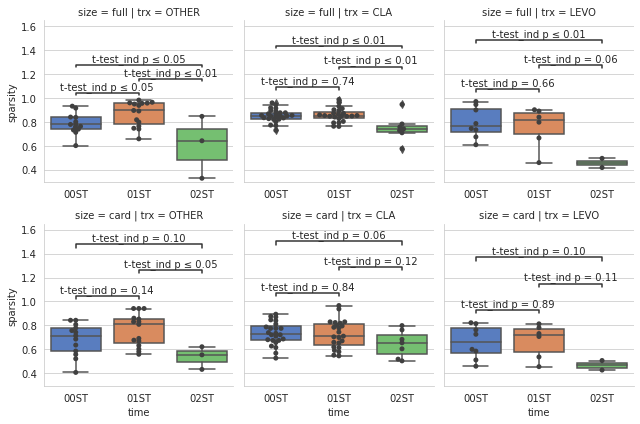

In [31]:
sparsity=sparsity[sparsity['sparsity']!=1]
g = sns.FacetGrid(sparsity,col='trx',row='size')#,col_order=ordered_days)#,row='metric')
### change this to 4 ^
g.map(sns.boxplot,'time','sparsity',palette='muted',order=['00ST','01ST','02ST'])

g.map(sns.swarmplot,'time','sparsity',order=['00ST','01ST','02ST'],color=".25")
box_pairs=[(('00ST'),('01ST')),(('01ST'),('02ST')),(('00ST'),('02ST'))]
for ax in g.axes.flatten(): 
    ax.tick_params(labelbottom=True)
    trxx=ax.get_title().split('|')[1].split('=')[1][1:]
    mm=ax.get_title().split('|')[0].split('=')[1][1:-1]
    data=sparsity[(sparsity['trx']==str(trxx))&(sparsity['size']==str(mm))]
    
    annotator =Annotator(ax, data=data, x='time', y='sparsity',pairs=box_pairs,verbose=0)#comparisons,
    annotator.configure(test='t-test_ind', text_format='simple', loc='inside',comparisons_correction='fdr_bh')
    annotator.apply_and_annotate()
plt.tight_layout()
plt.show()


In [32]:
sparsity

,sparsity,trx,time,size
weight_x,0.731505,OTHER,00ST,full
weight_y,0.914477,OTHER,00ST,full
weight_x,0.839475,OTHER,00ST,full
weight_y,0.778038,OTHER,00ST,full
weight_x,0.738279,OTHER,00ST,full
...,...,...,...,...
weight_y,0.707317,LEVO,01ST,card
weight_x,0.494728,LEVO,02ST,full
weight_y,0.417642,LEVO,02ST,full
weight_x,0.426667,LEVO,02ST,card


## time

In [ ]:
# np.round(LL.value,0)
LL=(L_0b).merge(L_1b,right_on=['source','target'],left_on=['source','target'],how='outer').merge(L_2b,right_on=['source','target'],left_on=['source','target'],how='outer').fillna(0)
LL=LL.groupby('source').sum()
LL.columns=['00ST','01ST','02ST']
LL=LL[((np.round(LL['00ST'],0))==(np.round(LL['01ST'],0)))&((np.round(LL['02ST'],0))==(np.round(LL['01ST'],0)))]
LL=LL.reset_index().melt('source')
LL.source=LL.source.str.split('_').str[2]

sns.relplot(data=LL, x="variable", y=(LL['value']),hue="source",kind="line")

In [ ]:
LL=(L_0b).merge(L_1b,right_on=['source','target'],left_on=['source','target'],how='outer').merge(L_2b,right_on=['source','target'],left_on=['source','target'],how='outer').fillna(0)
LL=LL.groupby('source').sum()
LL.columns=['00ST','01ST','02ST']
# LL=LL[(LL['00ST']==0)&(LL['01ST']!=0)&(LL['02ST']==0)]
LL=LL[(LL['00ST']<LL['01ST']/2)&(LL['01ST']/2>LL['02ST'])]
LL=LL.reset_index().melt('source')
LL.source=LL.source.str.split('_').str[2]

sns.relplot(data=LL, x="variable", y=(LL['value']),hue="source",kind="line")

In [ ]:
LL=(L_0b).merge(L_1b,right_on=['source','target'],left_on=['source','target'],how='outer').merge(L_2b,right_on=['source','target'],left_on=['source','target'],how='outer').fillna(0)
LL=LL.groupby('source').sum()
LL.columns=['00ST','01ST','02ST']
# LL=LL[(LL['00ST']!=0)&(LL['01ST']==0)&(LL['02ST']!=0)]
LL=LL[(LL['00ST']>LL['01ST']*2)&(LL['01ST']*2<LL['02ST'])]
LL=LL.reset_index().melt('source')
LL.source=LL.source.str.split('_').str[2]

sns.relplot(data=LL, x="variable", y=(LL['value']),hue="source",kind="line")

In [ ]:
LL=(L_0b).merge(L_1b,right_on=['source','target'],left_on=['source','target'],how='outer').merge(L_2b,right_on=['source','target'],left_on=['source','target'],how='outer').fillna(0)
LL=LL.groupby('source').sum()
LL.columns=['00ST','01ST','02ST']
LL=LL[(LL['00ST']>LL['01ST'])&(LL['01ST']>LL['02ST'])]
# CLA_val=FRcalc[(FRcalc['00']>FRcalc['01'])&(FRcalc['01']<FRcalc['02'])]
LL=LL.reset_index().melt('source')
LL.source=LL.source.str.split('_').str[2]

sns.relplot(data=LL, x="variable", y=(LL['value']),hue="source",kind="line")

In [ ]:
LL=(L_0b).merge(L_1b,right_on=['source','target'],left_on=['source','target'],how='outer').merge(L_2b,right_on=['source','target'],left_on=['source','target'],how='outer').fillna(0)
LL=LL.groupby('source').sum()
LL.columns=['00ST','01ST','02ST']
LL=LL[(LL['00ST']<LL['01ST'])&(LL['01ST']<LL['02ST'])]
LL=LL.reset_index().melt('source')
LL.source=LL.source.str.split('_').str[2]

sns.relplot(data=LL, x="variable", y=(LL['value']),hue="source",kind="line")

In [ ]:
LL=(L_0b).merge(L_1b,right_on=['source','target'],left_on=['source','target'],how='outer').merge(L_2b,right_on=['source','target'],left_on=['source','target'],how='outer').fillna(0)
LL=LL.groupby('target').sum()
LL.columns=['00ST','01ST','02ST']
# LL=LL[(LL['00ST']==0)&(LL['01ST']!=0)&(LL['02ST']==0)]
LL=LL[(LL['00ST']<LL['01ST']/5)&(LL['01ST']/5>LL['02ST'])]
LL=LL.reset_index().melt('target')
LL.source=LL.source.str.split('_').str[2]

sns.relplot(data=LL, x="variable", y=(LL['value']),hue="source",kind="line")

In [ ]:
def get_graph_info(graph):
    print("Number of nodes:", graph.number_of_nodes())
    print("Number of edges:", graph.number_of_edges())
    print("Average Cluster Coefficients:", nx.average_clustering(graph))
    print("Connected components:", len(list(nx.connected_components(graph))))

In [ ]:
LL=(L_0b).merge(L_1b,right_on=['source','target'],left_on=['source','target'],how='outer').merge(L_2b,right_on=['source','target'],left_on=['source','target'],how='outer').fillna(0)
LL.columns=['00','01','02']
LL=LL.reset_index()#.melt(['source','target'])
# LL['variable']=LL['variable'].astype('int')+2000
# LL['variable'] = pd.to_datetime(LL['variable'], format='%Y')
# LL=LL[LL.value>0]
# graphistry.edges(LL, 'source', 'target','value','variable').plot()

In [ ]:
# M.reset_index(inplace=True)
# M[np.argsort(np.sum(M,axis=1)),:]
LL

In [ ]:
M=LL.pivot('source',columns='target',values='00').fillna(0)
# N=M[np.argsort(np.sum(M,axis=1)),:][:,np.argsort(np.sum(M,axis=0))]
# plt.imshow(N, cmap='hot', interpolation='nearest',aspect='auto')
# plt.show()



In [ ]:
AA=LL.pivot('source',columns='target',values='01').fillna(0)

plt.imshow(AA, cmap='hot', interpolation='nearest',aspect='auto')
plt.show()



In [ ]:
AA=LL.pivot('source',columns='target',values='02').fillna(0)

plt.imshow(AA, cmap='hot', interpolation='nearest',aspect='auto')
plt.show()



In [ ]:
OTHERc=O_0c.merge(O_1c,on=['target']).merge(O_2c,on=['target'])
OTHERc.columns=['00ST','01ST','02ST']
CLAc=C_0c.merge(C_1c,on=['target']).merge(C_2c,on=['target'])
CLAc.columns=['00ST','01ST','02ST']
LEVOc=L_0c.merge(L_1c,on=['target']).merge(L_2c,on=['target'])
LEVOc.columns=['00ST','01ST','02ST']

In [ ]:
OTHERd=O_0d.merge(O_1d,on=['source']).merge(O_2d,on=['source'])
OTHERd.columns=['00ST','01ST','02ST']
CLAd=C_0d.merge(C_1d,on=['source']).merge(C_2d,on=['source'])
CLAd.columns=['00ST','01ST','02ST']
LEVOd=L_0d.merge(L_1d,on=['source']).merge(L_2d,on=['source'])
LEVOd.columns=['00ST','01ST','02ST']

In [ ]:
# tmp=plt.hist(O_0,log=True,bins=100)
# tmp=plt.hist(O_1,log=True,bins=100)
# tmp=plt.hist(O_2,log=True,bins=100)
sns.scatterplot(data=OTHERc, x="00ST", y="01ST")
sns.scatterplot(data=OTHERc, x="01ST", y="02ST")
plt.plot([0, 14], [0, 14],ls='--',color='grey')
# sns.scatterplot(data=OTHER, x="00ST", y="02ST")

In [ ]:
sns.scatterplot(data=OTHERd, x="00ST", y="01ST")
sns.scatterplot(data=OTHERd, x="01ST", y="02ST")
plt.plot([0, 800], [0, 800],ls='--',color='grey')

In [ ]:
# tmp=plt.hist(np.mean(C_0.groupby('target').sum(),axis=1),log=True,bins=100)
# tmp=plt.hist(np.mean(C_1.groupby('target').sum(),axis=1),log=True,bins=100)
# tmp=plt.hist(np.mean(C_2.groupby('target').sum(),axis=1),log=True,bins=100)
sns.scatterplot(data=CLAc, x="00ST", y="01ST")
sns.scatterplot(data=CLAc, x="01ST", y="02ST")
# sns.scatterplot(data=CLA, x="00ST", y="02ST")
plt.plot([0, 14], [0, 14],ls='--',color='grey')

In [ ]:
sns.scatterplot(data=CLAd, x="00ST", y="01ST")
sns.scatterplot(data=CLAd, x="01ST", y="02ST")
plt.plot([0, 800], [0, 800],ls='--',color='grey')

In [ ]:
# tmp=plt.hist(np.mean(L_0.groupby('target').sum(),axis=1),log=True,bins=100)
# tmp=plt.hist(np.mean(L_1.groupby('target').sum(),axis=1),log=True,bins=100)
# tmp=plt.hist(np.mean(L_2.groupby('target').sum(),axis=1),log=True,bins=100)
sns.scatterplot(data=LEVOc, x="00ST", y="01ST")
sns.scatterplot(data=LEVOc, x="01ST", y="02ST")
# sns.scatterplot(data=LEVO, x="01ST", y="02ST")
plt.plot([0, 14], [0, 14],ls='--',color='grey')

In [ ]:
sns.scatterplot(data=LEVOd, x="00ST", y="01ST")
sns.scatterplot(data=LEVOd, x="01ST", y="02ST")
plt.plot([0, 800], [0, 800],ls='--',color='grey')

## tracking temporal communities
[example code here](https://stackoverflow.com/questions/69064622/igraph-plot-for-multiple-layers-partition-does-not-return-expected-output)

In [ ]:
LL=(C_0b).merge(C_1b,right_on=['source','target'],left_on=['source','target'],how='outer').merge(C_2b,right_on=['source','target'],left_on=['source','target'],how='outer').fillna(0)
LL.columns=['00ST','01ST','02ST']

In [ ]:
# G=nx.from_pandas_edgelist(LL['00ST'].reset_index(),source='source',target='target',edge_attr='00ST')
# G_0 = ig.Graph.from_networkx(G)
# # G_1.vs['id']=G.nodes
# G=nx.from_pandas_edgelist(LL['01ST'].reset_index(),source='source',target='target',edge_attr='01ST')
# G_1 = ig.Graph.from_networkx(G)
# # G_2.vs['id']=G.nodes
# G=nx.from_pandas_edgelist(LL['02ST'].reset_index(),source='source',target='target',edge_attr='02ST')
# G_2 = ig.Graph.from_networkx(G)
# # G_3.vs['id']=G.nodes
# # G_1.vs['id'] = G_1.nodes
# print([G_0.is_bipartite(),G_1.is_bipartite(),G_2.is_bipartite()])

# # G_2 = ig.Graph.from_networkx(G_2)
# # G_3 = ig.Graph.from_networkx(G_3)

In [ ]:
# G_1 = ig.Graph.DataFrame(LL['00ST'].reset_index())
# G_2 = ig.Graph.DataFrame(LL['01ST'].reset_index())
# G_3 = ig.Graph.DataFrame(LL['02ST'].reset_index())


jj0=pd.DataFrame(LL['00ST'].reset_index())
jj0.columns=['start','end','value']
jj0=jj0[jj0['value']>0]
kk=pd.DataFrame(np.unique(jj0[['start','end']].melt()['value']))
kk.columns=['name']
kk['id']=kk['name']
kk['types']=np.concatenate([np.ones(len(np.unique(jj0.end))),np.zeros(len(np.unique(jj0.start)))]).astype('int')
G_00=igraph_from_pandas(edges_table=jj0, vertices_table=kk, source_cl='start', target_cl='end', vertex_attrs=list(kk.columns), vertex_id_cl='name', directed=False)

jj1=pd.DataFrame(LL['01ST'].reset_index())
jj1.columns=['start','end','value']
jj1=jj1[jj1['value']>0]
kk=pd.DataFrame(np.unique(jj1[['start','end']].melt()['value']))
kk.columns=['name']
kk['id']=kk['name']
kk['types']=np.concatenate([np.ones(len(np.unique(jj1.end))),np.zeros(len(np.unique(jj1.start)))]).astype('int')
G_11=igraph_from_pandas(edges_table=jj1, vertices_table=kk, source_cl='start', target_cl='end', vertex_attrs=list(kk.columns), vertex_id_cl='name', directed=False)


jj2=pd.DataFrame(LL['02ST'].reset_index())
jj2.columns=['start','end','value']
jj2=jj2[jj2['value']>0]
kk=pd.DataFrame(np.unique(jj2[['start','end']].melt()['value']))
kk.columns=['name']
kk['id']=kk['name']
kk['types']=np.concatenate([np.ones(len(np.unique(jj2.end))),np.zeros(len(np.unique(jj2.start)))]).astype('int')
G_22=igraph_from_pandas(edges_table=jj2, vertices_table=kk, source_cl='start', target_cl='end',vertex_attrs=list(kk.columns), vertex_id_cl='name', directed=False)

print([G_11.is_bipartite(),G_22.is_bipartite(),G_00.is_bipartite()])

## [community detection](https://igraph.org/c/doc/igraph-Community.html#igraph_community_multilevel)

In [8]:
def ready_net(C):#C in ['C','L','O']:
    LL=eval(str(C)+'_0b').merge(eval(str(C)+'_1b'),right_on=['source','target'],left_on=['source','target'],how='outer').merge(eval(str(C)+'_2b'),right_on=['source','target'],left_on=['source','target'],how='outer').fillna(0)
    LL.columns=['00ST','01ST','02ST']
    # modes = pd.concat([LL['mode'] for df in (df1, df2, df3, df4)], ignore_index=True).unique()
    LL.reset_index(inplace=True)
    LL['source']=LL['source'].str.split('_').str[2]
    
    return LL
CLA=ready_net('C')
LEVO=ready_net('L')
OTHER=ready_net('O')


In [11]:
species=pd.unique(np.concatenate([CLA['source'],LEVO['source'],OTHER['source']]))
colors = sns.color_palette('hls', len(species))
palette = {mode: color for mode, color in zip(species, colors)}

In [66]:

def plot_comm(CC,LL,OO,palette,j): ##time, community_type
    
    c=0
    fig, ax = plt.subplots(ncols=3, nrows=3,figsize=(15,15))
    # dict_keys = [k for k in z.keys()]
    for k in [CC,LL,OO]:
        web=(k)
        k=eval(k)
        for i in k.columns[2:]:
            
            jj0=pd.DataFrame(k[['source','target',i]])#.reset_index()
            jj0.columns=['start','end','value']
            jj0=jj0[jj0['value']>0]
            kk=pd.DataFrame(np.unique(jj0[['start','end']].melt()['value']))
            kk.columns=['name']
            kk['id']=kk['name']
            kk['types']=np.concatenate([np.ones(len(np.unique(jj0.end))),np.zeros(len(np.unique(jj0.start)))]).astype('int')
            G_00=igraph_from_pandas(edges_table=jj0, vertices_table=kk, source_cl='start', target_cl='end', vertex_attrs=list(kk.columns), vertex_id_cl='name', directed=False)

            G_00.vs['pagerank']=G_00.pagerank()
            G_00.vs['cluster'] = G_00.community_infomap().membership
                # N,Q,I,R=Parallel(n_jobs=10)(structural_analysis(ii,i,graphs,ARG_meta,rand=rand,deg_rand=deg_rand))

            # for j in [edge_betweenness,fastgreedy,infomap,label_propagation,leading_eigenvector,leiden,multilevel,_optimal_modularity,spinglass,walktrap]:
            # G_00.vs['louvain_membership']=G_00.community_multilevel().membership
            try:
                Path("run/gcn/img/"+j).mkdir(parents=True, exist_ok=True)
                G_00.vs[j+'membership']=eval('G_00.community_'+j)().membership
            except:
                G_00.vs[j+'membership']=eval('G_00.community_'+j)()
            g00e=G_00.get_edge_dataframe()#.reset_index()
            g00v=G_00.get_vertex_dataframe().reset_index()
            g00e['weight']=jj0['value']
            jj=g00e.merge(g00v,left_on='source',right_on='vertex ID').merge(g00v,left_on='target',right_on='vertex ID')
            jj.name_x, jj.name_y = np.where(jj.name_x.str.contains('UniRef'), [jj.name_y, jj.name_x], [jj.name_x, jj.name_y])
            # for j in ['louvain_','leiden_']:
            gg=jj.groupby(['name_x',j+'membership_x']).count().sort_values(['target',j+'membership_x'])
            gg=gg.reset_index()[['name_x',j+'membership_x','target']]
            # hh=hh.merge(gg,how='outer')
            
            # gg[j+'membership_x']=gg[j+'membership_x'].astype('category')
            sns.histplot(gg, x=gg[j+'membership_x'].astype('int')+1, hue='name_x',log_scale=[False,True], weights='target',multiple='stack',shrink=0.8,palette=palette,ax=ax.flat[c],legend=False).set_title(web+"_"+i)
            
            c=c+1
    # plt.figure(figsize=(10,6))
    
            # plt.set(xlabel=i+' '+j+' membership',yscale='log',ylabel='link count')
    # g.set_title(str(C)+'_'+i+'_'+j)
    # g.set_xlabel(i+' '+j+' membership')
            # g.set_yscale('log')
    plt.savefig('run/gcn/img/'+j+'.png', dpi=100)

In [ ]:
for j in ['multilevel','label_propagation','spinglass','infomap','leiden']:
    plot_comm('CLA','LEVO','OTHER',palette,j)

In [ ]:
# partitions[0].graph
# partitions[0].graph.vs['pagerank']=partitions[0].graph.pagerank()
# partitions[0].graph.vs['cluster'] = partitions[0].graph.community_infomap().membership
# partitions[0].graph.vs['membership']=partitions[0].membership
# plotter = graphistry.bind(source='source', destination='target')
# plotter.bind(point_color='membership', point_size='pagerank').plot(partitions[0].graph)

# G22_comms.graph.vs['pagerank']=G22_comms.graph.pagerank()
# G22_comms.graph.vs['cluster'] = G22_comms.graph.community_infomap().membership
# G22_comms.graph.vs['membership']=G22_comms.membership
# import graphistry, igraph, pandas as pd
# g = graphistry.edges(g00e, source='source', destination='target')

# g2 = (g.nodes(g00v, 'vertex ID').bind(point_title='name').bind(edge_title='weight'))

# ig = g2.to_igraph(directed=False)
# ig.vs['cluster'] = ig.community_infomap().membership
g3a = graphistry.from_igraph(G_22, load_edges=True, load_nodes=True,node_attributes=[,'vertex ID', 'cluster'])
g3a._nodes.sample(3)

g3b = g3a.nodes(g3a._nodes.assign(color=g3a._nodes['cluster'].apply(lambda x: x % 9).astype('int32')))

g3 = g3b.encode_point_color('color').bind(edge_weight='counts')

g3.plot()

# load just the desired attributes: reuse original edges, and enrich with just cluster
# g3a = g2.from_igraph(ig, load_edges=False, node_attributes=['vertex ID', 'cluster'])
# g3a._nodes.sample(3)

# plotter = graphistry.bind(source='source', destination='target')
# plotter.bind( point_size='cluster').plot(G_00)

# G_00.vs['pagerank']=G_00.pagerank()
# G_11.vs['pagerank']=G_11.pagerank()
# G_22.vs['pagerank']=G_22.pagerank()

# G_00.vs['cluster'] = G_00.community_infomap().membership
# G_11.vs['cluster'] = G_11.community_infomap().membership
# G_22.vs['cluster'] = G_22.community_infomap().membership


## resume partition

In [ ]:
optimiser = la.Optimiser()
G_coupling = ig.Graph.Formula('1 -- 2 -- 3');
G_coupling.es['weight'] = 0.1; # Interslice coupling strength
G_coupling.vs['slice'] = [G_00, G_11, G_22]
# G_coupling.vs['types'] = [G_11.vs['types'], G_22.vs['types'], G_33.vs['types']]
node_size=0
gamma=0

In [ ]:
# membership, improvement = la.find_partition_multiplex([G_1, G_2, G_3],la.ModularityVertexPartition)
layers, interslice_layer, G_full = la.slices_to_layers(G_coupling);
partitions = [la.CPMVertexPartition(H, node_sizes='node_size',weights='weight',resolution_parameter=gamma)for H in layers]
partitions.append(la.CPMVertexPartition(interslice_layer, resolution_parameter=0,node_sizes='node_size', weights='weight'))
# diffA = optimiser.optimise_partition_multiplex(partitions + [interslice_partition])

In [ ]:
# membership, improvement = la.find_partition_multiplex([G_1, G_2, G_3],la.ModularityVertexPartition)
layers, interslice_layer, G_full = la.time_slices_to_layers([G_00, G_11, G_22],interslice_weight=0.1)
partitions = [la.CPMVertexPartition(H, node_sizes='node_size',weights=1,resolution_parameter=.5)for H in layers]
partitions.append(la.CPMVertexPartition(interslice_layer, resolution_parameter=0,node_sizes='node_size', weights='weight'))
# diffB = optimiser.optimise_partition_multiplex(partitions + [interslice_partition])

In [ ]:
# G0=partitions[2].graph.get_edge_dataframe().sort_values(by=['source','target'])
# AA=G0.pivot('source',columns='target',values='weight').fillna(0)
# plt.imshow(AA, cmap='hot', interpolation='nearest',aspect='auto')
# plt.show()

# tmp=plt.hist(G0['source'],bins=100,log=True)
# tmp=plt.hist(G0['target'],bins=100,log=True,alpha=.5)

In [ ]:
# df = partitions[2].graph.get_edge_dataframe()
# df_vert = partitions[2].graph.get_vertex_dataframe()

# df['source'].replace(df_vert['name'], inplace=True)
# df['target'].replace(df_vert['name'], inplace=True)
# df_vert.set_index('name', inplace=True)  # Optional
# df_vert['membership']=partitions[1].membership


In [ ]:
g = G_00.to_graph_tool()
in_hist = vertex_hist(g, "in")

y = in_hist[0]
err = sqrt(in_hist[0])
err[err >= y] = y[err >= y] - 1e-2

figure(figsize=(6,4))
errorbar(in_hist[1][:-1], in_hist[0], fmt="o", yerr=err,
        label="00ST_in_deg")

g = G_11.to_graph_tool()
in_hist = vertex_hist(g, "in")

y = in_hist[0]
err = sqrt(in_hist[0])
err[err >= y] = y[err >= y] - 1e-2

# figure(figsize=(6,4))
errorbar(in_hist[1][:-1], in_hist[0], fmt="o", yerr=err,
        label="01ST_in_deg")

g = G_22.to_graph_tool()
in_hist = vertex_hist(g, "in")

y = in_hist[0]
err = sqrt(in_hist[0])
err[err >= y] = y[err >= y] - 1e-2

# figure(figsize=(6,4))
errorbar(in_hist[1][:-1], in_hist[0], fmt="o", yerr=err,
        label="02ST_in_deg")
gca().set_yscale("log")
gca().set_xscale("log")
gca().set_ylim(1e-1, 1e4)
gca().set_xlim(0.8, 1e2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
subplots_adjust(left=0.2, bottom=0.2)
xlabel("$k_{in}$")
ylabel("$NP(k_{in})$")
tight_layout()

In [ ]:
state = gt.minimize_nested_blockmodel_dl(g)

In [ ]:
state.draw()

In [ ]:
state_ndc = gt.minimize_nested_blockmodel_dl(g, state_args=dict(deg_corr=False))
state_dc  = gt.minimize_nested_blockmodel_dl(g, state_args=dict(deg_corr=True))

print("Non-degree-corrected DL:\t", state_ndc.entropy())
print("Degree-corrected DL:\t", state_dc.entropy())

In [ ]:
print(u"ln \u039b: ", state_dc.entropy() - state_ndc.entropy())

In [ ]:
state = gt.BlockState(g)   # This automatically initializes the state with a partition
                           # into one group. The user could also pass a higher number
                           # to start with a random partition of a given size, or pass a
                           # specific initial partition using the 'b' parameter.

# Now we run 1,000 sweeps of the MCMC. Note that the number of groups
# is allowed to change, so it will eventually move from the initial
# value of B=1 to whatever is most appropriate for the data.

dS, nattempts, nmoves = state.multiflip_mcmc_sweep(niter=1000)

print("Change in description length:", dS)
print("Number of accepted vertex moves:", nmoves)

In [ ]:
levels = state.get_levels()
for s in levels:
    print(s)
    if s.get_N() == 1:
        break

In [ ]:
tree = min_spanning_tree(g)
graph_draw(g, edge_color=tree,output="min_tree.svg"))

g.set_edge_filter(tree)
graph_draw(g,output="min_tree_filtered.svg")

In [ ]:
g = G_11.to_graph_tool()
state = gt.minimize_blockmodel_dl(g, state=gt.PPBlockState)
state.multiflip_mcmc_sweep(beta=np.inf, niter=100)
# pos = sfdp_layout(g)
# state.draw(g)#, output_size=(1000, 1000), vertex_color=[1,1,1,0])
           # vertex_size=1, edge_pen_width=1.2)#,
           # vcmap=[plt].cm.gist_heat_r)
state.draw(output='')#pos=g.vp.pos)

In [ ]:
# red_cm = plt.colors.LinearSegmentedColormap.from_list("Set3", clrs)

# draw red edge last
eorder = u.ep.eprob.copy()
eorder.a *= -1

bstate.draw(pos=u.own_property(g.vp.pos), vertex_shape="pie", vertex_pie_fractions=pv,
            edge_pen_width=gt.prop_to_size(ew, .1, 4, power=1),
            edge_gradient=None, edge_color=u.ep.eprob, #ecmap=red_cm,
            eorder=eorder)

In [ ]:
G0=interslice_layer.to_networkx()
G1=layers[0].to_networkx()#.to_pandas_adjacency()
G2=layers[1].to_networkx()#.to_pandas_adjacency()
G3=layers[2].to_networkx()#.to_pandas_adjacency()

In [ ]:
G0=nx.to_pandas_edgelist(G0)
G0=G0[G0['weight']>0]

G1=nx.to_pandas_edgelist(G1)
G1=G1[G1['weight']>0]

G2=nx.to_pandas_edgelist(G2)
G2=G2[G2['weight']>0]

G3=nx.to_pandas_edgelist(G3)
G3=G3[G3['weight']>0]
# G1=nx.to_pandas_adjacency(G1)
# G2=nx.to_pandas_adjacency(G2)
# G3=nx.to_pandas_adjacency(G3)
# partitions

In [ ]:
AA=G0.pivot('source',columns='target',values='weight').fillna(0)


plt.imshow(AA, cmap='hot', interpolation='nearest',aspect='auto')
plt.show()

In [ ]:
AA=G1.pivot('source',columns='target',values='weight').fillna(0)

plt.imshow(AA, cmap='hot', interpolation='nearest',aspect='auto')
plt.show()

In [ ]:
AA=G2.pivot('source',columns='target',values='weight').fillna(0)

plt.imshow(AA, cmap='hot', interpolation='nearest',aspect='auto')
plt.show()

In [ ]:
AA=G3.pivot('source',columns='target',values='weight').fillna(0)

plt.imshow(AA, cmap='hot', interpolation='nearest',aspect='auto')
plt.show()

In [ ]:
fig=plt.figure(figsize=(5,15))
ax = fig.add_subplot(projection='3d')
LayeredNetworkGraph([G0,G1,G2], ax=ax, layout=nx.spring_layout)
ax.set_axis_off()
# ax.figsize(5,15)
# plt.show()
fig.set_size_inches(20, 20)
fig.savefig('LEVO_itemp_comm.png', dpi=100)

# summary network metrics

In [ ]:
cc=pd.read_csv('~/data/gcn/comp_net/post_nest_clust_AA.txt',sep='\t',names=['name','AC','RAC','D','SB'])
AVG=cc.melt('name')
AVG['trx']=AVG['name'].str.split('_').str[1]
AVG['time']=AVG['name'].str.split('_').str[2]
AVG['metric']=AVG['variable']


In [ ]:
# LCC=LC.melt()
# LCC['trx']=LCC.variable.str.split('_').str[1]
# LCC['time']=LCC.variable.str.split('_').str[2]
# LCC['metric']=LCC.variable.str.split('_').str[3]
# LCC=LCC[LCC.value!=0]
# LC.columns=AVG.columns.str.replace("_00", "_00ST")
# LC.columns=LC.columns.str.replace("_00STST", "_00ST")
AVG['time']=AVG['time'].replace("03ST", "02ST")
ordered_days = sorted(AVG['trx'].unique())
g = sns.FacetGrid(AVG,col='trx',col_order=ordered_days,row='metric')
#                                               change this to 4 ^
g.map(sns.boxplot,'time','value',palette='muted')
box_pairs=[(('00ST'),('01ST')),(('01ST'),('02ST')),(('00ST'),('02ST'))]
for ax in g.axes.flatten(): 
    ax.tick_params(labelbottom=True)
    trxx=ax.get_title().split('|')[0].split('=')[1][1:-1]
    mm=ax.get_title().split('|')[1].split('=')[1][1:]
    data=AVG[(AVG['metric']==str(trxx))&(AVG['trx']==str(mm))]

    annotator =Annotator(ax, data=data, x='time', y='value',pairs=box_pairs,verbose=0)#comparisons,
    annotator.configure(test='t-test_ind',comparisons_correction='Bonferroni', text_format='simple', loc='inside')
    annotator.apply_and_annotate()
    # print(ax)
plt.tight_layout()
plt.show()




In [ ]:
# B2graphs = load_list_of_dicts('data/gcn/B2X_Emore_ARG.pkl')
# # PS=pd.read_csv('data/gcn/comp_net/post_nest_clust_AA.txt',sep='\t',names=['G','C','AC','RAC','D','SB'])
# # LC=pd.DataFrame(columns=['Cl','LC','DC','BC','CC'])
G=B2graphs[12]


remove = [node for node,degree in dict(G.degree()).items() if degree < 3]
G.remove_nodes_from(remove)
top_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(G) - top_nodes


tC=bipart(G,'clustering',top_nodes)
tLC=bipart(G,'latapy_clustering',top_nodes)
tNR=bipart(G,'node_redundancy',top_nodes)
tDC=bipart(G,'degree_centrality',top_nodes)
tBC=bipart(G,'betweenness_centrality',top_nodes)
tCC=bipart(G,'closeness_centrality',top_nodes)
# tMEC=bipart(G,'min_edge_cover',top_nodes)
tSBP=bipart(G,'spectral_bipartivity',top_nodes)

In [ ]:
# LCC=LC.melt()
box_pairs=[]
for i in ['OTHER','LEVO','CLA']:
    for j in ['_CT','_LC','_DC','_BC','_CC']:
        LCC=LC.filter(like=i,axis=1)
        LCC=LCC.filter(like=j,axis=1).melt()
        LCC.variable=LCC.variable.str.split('_').str[1]+'_'+LCC.variable.str.split('_').str[2]+'_'+LCC.variable.str.split('_').str[3]
        box_pairs.append(list(combinations(np.unique(LCC.variable), 2)))
box_pairs = list(chain(*box_pairs))

In [ ]:
files=glob.glob('data/gcn/comp_net/*post_nest_clust_BIP2.txt')
for i,file in enumerate(files):
    jj=os.path.basename(file).split('_post')[0]
    if i==0:
        LC=pd.read_csv(file,sep='\t',names=[jj+'_tC',jj+'_tLC',jj+'_tNR',jj+'_tDC',jj+'_tBC',jj+'_tCC',jj+'_tSBP',jj+'_bC',jj+'_bLC',jj+'_bNR',jj+'_bDC',jj+'_bBC',jj+'_bCC',jj+'_bSBP'])
    else:
        LC=pd.merge(LC,pd.read_csv(file,sep='\t',names=[jj+'_tC',jj+'_tLC',jj+'_tNR',jj+'_tDC',jj+'_tBC',jj+'_tCC',jj+'_tSBP',jj+'_bC',jj+'_bLC',jj+'_bNR',jj+'_bDC',jj+'_bBC',jj+'_bCC',jj+'_bSBP']),right_index=True,left_index=True,how='left')
# LC.columns=LC.columns.str.replace("_00", "_00ST")
# LC.columns=LC.columns.str.replace("_00STST", "_00ST")
LC.columns=LC.columns.str.replace("_03ST", "_02ST")

LCC=LC.melt()
LCC['trx']=LCC.variable.str.split('_').str[1]
LCC['time']=LCC.variable.str.split('_').str[2]
LCC['metric']=LCC.variable.str.split('_').str[3]
LCC=LCC[LCC.value!=0]
LCC=LCC.dropna()[~LCC.duplicated(keep='first')]
LCC.to_csv('data/gcn/comp_net/LCC_clust_BIP2.txt',sep='\t',header=True,index=True)
# LCC=LCC[(!LCC['metric'].contains'BSP')
# BSP, BC, NR
LCC=LCC[(~LCC.metric.str.contains('SBP'))&(~LCC.metric.str.contains('BC'))&(~LCC.metric.str.contains('NR'))]

ordered_days = sorted(LCC['trx'].unique())
g = sns.FacetGrid(LCC,col='trx',col_order=ordered_days,row='metric')
### change this to 4 ^
g.map(sns.boxplot,'time','value',palette='muted',order=['00ST','01ST','02ST'])
box_pairs=[(('00ST'),('01ST')),(('01ST'),('02ST')),(('00ST'),('02ST'))]
for ax in g.axes.flatten(): 
    ax.tick_params(labelbottom=True)
    trxx=ax.get_title().split('|')[0].split('=')[1][1:-1]
    mm=ax.get_title().split('|')[1].split('=')[1][1:]
    data=LCC[(LCC['metric']==str(trxx))&(LCC['trx']==str(mm))]
    
    annotator =Annotator(ax, data=data, x='time', y='value',pairs=box_pairs,verbose=0)#comparisons,
    annotator.configure(test='t-test_ind', text_format='simple', loc='inside',comparisons_correction='Bonferroni')
    annotator.apply_and_annotate()
plt.tight_layout()
plt.show()




In [ ]:
data=LCC[(LCC['trx']=='LEVO')&(LCC['metric']=='BC')]
stats.ttest_ind(data[data['time']=='00ST'].value,data[data['time']=='01ST'].value)

In [ ]:
ddd=ccc[ccc['source'].str.contains('UniRef')]
ddd[['source','target']] = ddd[['target','source']]
ccc=ccc[~ccc['source'].str.contains('UniRef')].append(ddd)
ccc=ccc.sort_values(by=['source','target'])

In [ ]:
AA=ccc.pivot('source',columns='target',values=ccc.columns[2]).fillna(0)#.round().astype('int').to_numpy())
# BB=ccc.pivot('source',columns='target',values=ccc.columns[2]).fillna(0).round().astype('int')#.to_numpy())M


In [ ]:
tmp=pd.read_csv('tmp.txt',header=None)
tmp=tmp[0].str.split('.').str[1]
ddd=tmp.dropna()
len(ddd)
eee=pd.DataFrame(np.zeros((len(ddd),len(AA.columns))))
eee.index=ddd
eee.columns=AA.columns
AA=AA.append(eee)
AA=AA.reset_index().groupby('index').sum()
AA=AA.loc[:, (AA != 0).any(axis=0)]
AA=AA.loc[(AA != 0).any(axis=1),:]
M=((AA>0)*1).to_numpy()

## NestedNess

In [ ]:
# M,*_ = NetworkGenerator.generate(500, 500, 4, bipartite=True, P=0.5, mu=0.5, alpha=2.5, min_block_size=0, fixedConn=False, link_density=2.45)

In [ ]:
# M=np.corrcoef(np.transpose(M))
# M=((np.abs(M)>0.5)*1)

In [ ]:
cols_degr=M.sum(axis=0)
row_degr=M.sum(axis=1)
R,C=M.shape #rows and cols

C_=extremal_bi.recursive_step(M,cols_degr,row_degr,.7,3,False)
Ci_=extremal_bi.recursive_step(M,cols_degr,row_degr,.7,3,True)

In [ ]:
M[C_[0],:][:,C_[1]].shape
# A[0,:][:,0]

In [ ]:
plt.imshow(M, cmap='hot', interpolation='nearest',aspect='auto')
plt.show()

In [ ]:
N=M[np.argsort(np.sum(M,axis=1)),:][:,np.argsort(np.sum(M,axis=0))]
plt.imshow(N, cmap='hot', interpolation='nearest',aspect='auto')
plt.show()

In [ ]:
plt.imshow(M[C_[0],:][:,C_[1]], cmap='hot', interpolation='nearest',aspect='auto')
plt.show()

In [ ]:
plt.imshow(M[Ci_[0],:][:,Ci_[1]], cmap='hot', interpolation='nearest',aspect='auto')
plt.show()

In [ ]:
aa=ccc.values
# nodes_cols = int(max(aa[j,1] for j in range(aa.shape[0]))+1)
# nodes_rows= int(max(aa[j,0] for j in range(aa.shape[0]))+1)
matrix=np.zeros((len(np.unique(ccc['source'])),len(np.unique(ccc['target']))),dtype='int')

In [ ]:
t_12_CLA_00ST=pd.read_csv('nest/CLA_00ST/target_ARG035-00ST.txt',sep='\t',names=['C','protein'])
s_12_CLA_00ST=pd.read_csv('nest/CLA_00ST/source_ARG035-00ST.txt',sep='\t',names=['R','species'])
ib_12_CLA_00ST=pd.read_csv('nest/CLA_00ST/in-block_ARG035-00ST.txt',sep='\t',names=['R','C'])
mod_12_CLA_00ST=pd.read_csv('nest/CLA_00ST/modularity_ARG035-00ST.txt',sep='\t',names=['R','C'])

In [ ]:
species=s_12_CLA_00ST['species'].dropna()
link_source=s_12_CLA_00ST['R'].dropna()
s_12_CLA_00ST=pd.DataFrame(species[link_source]).reset_index()

In [ ]:
protein=t_12_CLA_00ST['protein'].dropna()
link_source=t_12_CLA_00ST['C'].dropna()
t_12_CLA_00ST=pd.DataFrame(protein[link_source]).reset_index()

In [ ]:
[np.unique(ib_12_CLA_00ST['C']),
 np.unique(ib_12_CLA_00ST['R'])]#.merge(t_12_CLA_00ST,left_on='C',right_on='index')
# IB#[~IB.duplicated(keep='first')]

In [ ]:
ARG_meta=pd.read_excel('run/gcn/ARG_treatment_infor_modified.xlsx',index_col=0)
ARG_meta2=pd.read_excel('run/gcn/patients_Tx_batch3_for_DM.xlsx',index_col=None,skiprows=1,names=['id','group'])
relgene.columns=relgene.columns.str.replace("-00", "-00ST")
relgene.columns=relgene.columns.str.replace("-00STST", "-00ST")
relgene.columns=relgene.columns.str.split('-').str[0]+'-'+relgene.columns.str.split('-').str[1]
ARG_meta['id']=ARG_meta['id'].str.replace('-00ST','')
META=pd.concat([pd.DataFrame(ARG_meta[['id','group']]),ARG_meta2],ignore_index=True)

In [ ]:
AA=np.loadtxt('nest/OTHER_00ST/32_OTHER_00ST.csv',dtype='int')
ccc=pd.DataFrame(AA)
ddd=ccc.sample(frac=0.2, replace=False, random_state=1)
rrr=ccc[~ccc.isin(ddd)].dropna(how='all')
ddd.reset_index(inplace=True)
del ddd['index']
sss=shuffle_net(ddd)
eee=pd.concat([rrr,sss])
aa=np.array(eee).astype(int)

In [ ]:
# np.sum(eee.sort_values(['source','target']).reset_index()['ARG008-01ST-01-DNA_Abundance-RPKs']==ccc.sort_values(['source','target']).reset_index()['ARG008-01ST-01-DNA_Abundance-RPKs'])

In [ ]:
#!python nestedness_analysis/structural_analysis.py nest/OTHER_01ST/ True True False False

In [ ]:
# ccc.sort_values(['source','target'])==ddd.sort_values(['source','target'])

In [ ]:
# C=pd.read_csv('~/data_structures_NQI_results.csv',header=0)#,'type','init'],sep='\t')
def create_data(path,rand):    
    C=pd.read_csv(path,header=0)#,'type','init'],sep='\t')
    #### for randomized samples
    C=C[C['name']!='name']
    C['R']=C['R'].str.replace("False", "0")
    # pd.unique(C['name'])
    C=C[C['R']==rand]
    del C['R']

    # ####
    C['type']=C['name'].str.split('_').str[1]+'_'+C['name'].str.split('_').str[2]
    C['type']=C['type'].str.replace("_00", "_00ST")
    # # C=C[~C['type'].str.contains("03")]
    C['type']=C['type'].str.replace("_03ST", "_02ST")
    C['type']=C['type'].str.replace("_00STST", "_00ST")
    C['sample']=C['name'].str.split('_').str[0]
    C=C[C['N']!='0.0']
    # C=C[~C['name'].duplicated(keep='last')]
    C=C[~C[['type','sample']].duplicated(keep='last')]
    del C['name']
    C.reset_index(inplace=True)
    del C['index']
    D=C.pivot(index='sample', columns='type', values=['N','I','Q'])
    D=D.astype('float')
    return D

def form_tests(data,var,level):
    E0=data[var].reset_index()
    E0=E0[['sample',level+'_00ST',level+'_01ST',level+'_02ST']]
    E0['var']=var
    return E0
def merge_form(data,level):
    E0=form_tests(data,'N',level)
    E1=form_tests(data,'I',level)
    E2=form_tests(data,'Q',level)
    E=E0.append(E1)
    E=E.append(E2)
    return E
def output_data(D):
    E=merge_form(D,'CLA')
    G=merge_form(D,'LEVO')
    F=merge_form(D,'OTHER')
    H=E.merge(G,on=['sample','var'])
    H=H.merge(F,on=['sample','var'])
    # H.set_index(['var','sample'],inplace=True)
    # del H['var_x'],H['var_y']#,H0['type']
    return H

# def prep_sub(H0):

#     return H0

In [ ]:
D0=create_data('randB_NQI_results.csv','0')
H0=output_data(D0)
# H0=prep_sub(H0)
D1=create_data('randB_NQI_results.csv','.2')
H1=output_data(D1)
# H1=prep_sub(H1)
D2=create_data('randB_NQI_results.csv','.99')
H2=output_data(D2)
# H2=prep_sub(H2)

In [ ]:
H00=H0.melt(['sample','var'])
H11=H1.melt(['sample','var'])
H22=H2.melt(['sample','var'])
H01=H00.merge(H11,on=['sample','var','type'])
H01['diff']=H01['value_x']-H01['value_y']
H02=H00.merge(H22,on=['sample','var','type'])
H02['diff']=H02['value_x']-H02['value_y']

In [ ]:
H12=H01.merge(H02,on=['sample','var','type'])

In [ ]:
plt.figure(figsize=(6,6))
tmp=sns.scatterplot(data=H12,x='diff_x',y='diff_y',hue='var')#,bins=50,alpha=.3)
plt.xlim(-.2,.5)
plt.ylim(-.2,.5)
plt.plot([-.2, .5], [-.2, .5],ls='--',color='grey')
plt.xlabel('robust= Real - 20% shuffled')
plt.ylabel('random= Real - 99% shuffled')

In [ ]:
FR0=pd.read_csv('SYNCSA_eval/rand0_FRall.csv')
FR0.rename(columns={'Unnamed: 0':'sample','cc.Simpson':'real_simpson','cc.FunRao':'real_Rao','cc.FunRedundancy':'real_FR','i':'type'},inplace=True)
FR0['sample']=FR0['sample'].str.split('_').str[0]
# FR_NIQ=FR.merge(NIQ,on=['sample','type'])

FR2=pd.read_csv('SYNCSA_eval/rand02_FRall.csv')
FR2.rename(columns={'Unnamed: 0':'sample','cc.Simpson':'robust_simpson','cc.FunRao':'robust_Rao','cc.FunRedundancy':'robust_FR','i':'type'},inplace=True)
FR2['sample']=FR2['sample'].str.split('_').str[0]
FR02=FR2.merge(FR0,on=['sample','type'])


FR9=pd.read_csv('SYNCSA_eval/rand9_FRall.csv')
FR9.rename(columns={'Unnamed: 0':'sample','cc.Simpson':'random_simpson','cc.FunRao':'random_Rao','cc.FunRedundancy':'random_FR','i':'type'},inplace=True)
FR9['sample']=FR9['sample'].str.split('_').str[0]
FR029=FR02.merge(FR9,on=['sample','type'])



In [ ]:
# H12.columns=['sample','var','type','real','robust','tmp','tmp','random','tmp']
# del H12['tmp']
NIQ=H12.pivot(['sample','type'],columns='var')
NIQ.columns = [''.join(col) for col in NIQ.columns]
NIQ.reset_index(inplace=True)

# FR=pd.read_csv('SYNCSA_eval/rand0_FRall.csv')
# FR.rename(columns={'Unnamed: 0':'sample','cc.Simpson':'simpson','cc.FunRao':'Rao_Entropy','cc.FunRedundancy':'FR','i':'type'},inplace=True)
# FR['sample']=FR['sample'].str.split('_').str[0]
FR_NIQ=FR029.merge(NIQ,on=['sample','type'])

In [ ]:
FR_NIQ.set_index(['sample','type'], inplace=True)
FR_NIQ=FR_NIQ.astype('float')
FR_NIQ.reset_index(inplace=True)

In [ ]:
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

FRNQ=FR_NIQ[['sample','type','real_FR','realQ','realN']].dropna(how='any')

######################################## Data preparation #########################################

# file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'
# df = pd.read_csv(file)

X = np.array(FRNQ[['realQ','realN']])#df[['Por', 'Brittle']].values.reshape(-1,2)
Y = np.array(FRNQ['real_FR'])#df['Prod']

######################## Prepare model data point for visualization ###############################
# x = np.array(FRNQ['FR'])
# y = np.array(FRNQ['realQ'])
# z = np.array(FRNQ['realN'])

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 1, 10)   # range of porosity values
y_pred = np.linspace(0, 1, 10)  # range of brittleness values
# z_pred = np.linspace(0, 1, 10)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='.', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('nestedness (N)', fontsize=12)
    ax.set_ylabel('modularity (Q)', fontsize=12)
    ax.set_zlabel('FuncRed', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

# ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax1.transAxes, color='grey', alpha=0.5)
# ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax2.transAxes, color='grey', alpha=0.5)
# ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [ ]:
FR_II=FR_NIQ.filter(like='real',axis=1).melt('real_FR')
plt.figure(figsize=(6,6))
tmp=sns.scatterplot(data=FR_II,x='real_FR',y='value',hue='variable')
# plt.xlim(0,1)
# plt.ylim(0,1)
# plt.plot([0, 1], [0, 1],ls='--',color='grey')



In [ ]:
import matplotlib.pyplot as plt
def annotate(data, **kws):
    n = sum(FR_NIQ.filter(like='FR',axis=1)==FR_NIQ.filter(like='simpson',axis=1)-FR_NIQ.filter(like='Rao',axis=1))
    ax = plt.gca()
    ax.text(.1, .6, f"N = {n}", transform=ax.transAxes)

g = sns.FacetGrid(FR_NIQ.filter(like='FR',axis=1).melt(like='FR'), col="time")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.map_dataframe(annotate)

In [ ]:
[sum(FR_NIQ['real_FR']==FR_NIQ['real_simpson']-FR_NIQ['real_Rao']),
sum(FR_NIQ['robust_FR']==FR_NIQ['robust_simpson']-FR_NIQ['robust_Rao']),
sum(FR_NIQ['random_FR']==FR_NIQ['random_simpson']-FR_NIQ['random_Rao'])]

In [ ]:
def testprep(D):
    E0=D['N'].reset_index()
    E0=E0[['CLA_00ST','CLA_01ST','CLA_02ST']]
    E0['type']='N'

    E1=D['I'].reset_index()
    E1=E1[['CLA_00ST','CLA_01ST','CLA_02ST']]
    E1['type']='I'

    E2=D['Q'].reset_index()
    E2=E2[['CLA_00ST','CLA_01ST','CLA_02ST']]
    E2['type']='Q'
    E=E0.append(E1)
    E=E.append(E2)

    E0=D['N'].reset_index()
    E0=E0[['LEVO_00ST','LEVO_01ST','LEVO_02ST']]
    E0['type']='N'

    E1=D['I'].reset_index()
    E1=E1[['LEVO_00ST','LEVO_01ST','LEVO_02ST']]
    E1['type']='I'

    E2=D['Q'].reset_index()
    E2=E2[['LEVO_00ST','LEVO_01ST','LEVO_02ST']]
    E2['type']='Q'
    F=E0.append(E1)
    F=F.append(E2)

    E0=D['N'].reset_index()
    E0=E0[['OTHER_00ST','OTHER_01ST','OTHER_02ST']]
    E0['type']='N'

    E1=D['I'].reset_index()
    E1=E1[['OTHER_00ST','OTHER_01ST','OTHER_02ST']]
    E1['type']='I'

    E2=D['Q'].reset_index()
    E2=E2[['OTHER_00ST','OTHER_01ST','OTHER_02ST']]
    E2['type']='Q'
    G=E0.append(E1)
    G=G.append(E2)
    return E,F,G

In [ ]:
from itertools import combinations

def ttest_run(c1, c2, E):
    N=E[E['type']=='N'][[c1,c2]]#.dropna(how='any')
    I=E[E['type']=='I'][[c1,c2]]#.dropna(how='any')
    Q=E[E['type']=='Q'][[c1,c2]]#.dropna(how='any')
    try:
        resultsA = stats.ttest_rel(N[c1],N[c2],axis=0, nan_policy='omit', alternative='two-sided')
        resultsB = stats.ttest_rel(I[c1],I[c2],axis=0, nan_policy='omit', alternative='two-sided')
        resultsC = stats.ttest_rel(Q[c1],Q[c2],axis=0, nan_policy='omit', alternative='two-sided')
        df = pd.DataFrame({'categ1': c1,
                           'categ2': c2,
                           'Ntstat': resultsA.statistic,
                           'Npvalue': resultsA.pvalue/2,
                           'Itstat': resultsB.statistic,
                           'Ipvalue': resultsB.pvalue/2,
                           'Qtstat': resultsC.statistic,
                           'Qpvalue': resultsC.pvalue/2,
                            'test':'paired'}, 
                           index = [0])
    except:
        resultsA = stats.ttest_rel(N[c1],N[c2])#, axis=0, nan_policy='omit', alternative='greater')
        resultsB = stats.ttest_rel(I[c1],I[c2])#,axis=0, nan_policy='omit', alternative='greater')
        resultsC = stats.ttest_rel(Q[c1],Q[c2])#,axis=0, nan_policy='omit', alternative='greater')
        df = pd.DataFrame({'categ1': c1,
                           'categ2': c2,
                           'Ntstat': resultsA.statistic,
                           'Npvalue': resultsA.pvalue,
                           'Itstat': resultsB.statistic,
                           'Ipvalue': resultsB.pvalue,
                           'Qtstat': resultsC.statistic,
                           'Qpvalue': resultsC.pvalue,
                          'test':'ind'}, 
                           index = [0])
    return df
df_list=pd.DataFrame()
for ii in [E,F,G]:
    c = [ttest_run(i, j, ii) for i, j in combinations(ii.columns[:3].unique().tolist(), 2)]
    df_list=df_list.append(c)

# final_df = pd.concat(df_list, ignore_index = True)

In [ ]:
df_list=pd.DataFrame()
E,F,G=testprep(D0)
for ii in [E,F,G]:
    c = [ttest_run(i, j, ii) for i, j in combinations(ii.columns[:3].unique().tolist(), 2)]
    df_list=df_list.append(c)
df00=df_list
df00.set_index(['categ1','categ2'],inplace=True)#.astype('float')#-df02.astype('float')
del df00['test']
df00

In [ ]:
df_list=pd.DataFrame()
E,F,G=testprep(D1)
for ii in [E,F,G]:
    c = [ttest_run(i, j, ii) for i, j in combinations(ii.columns[:3].unique().tolist(), 2)]
    df_list=df_list.append(c)
df02=df_list
df02.set_index(['categ1','categ2'],inplace=True)#.astype('float')#-df02.astype('float')
del df02['test']
df02

In [ ]:
df_list=pd.DataFrame()
E,F,G=testprep(D2)
for ii in [E,F,G]:
    c = [ttest_run(i, j, ii) for i, j in combinations(ii.columns[:3].unique().tolist(), 2)]
    df_list=df_list.append(c)
df99=df_list
df99.set_index(['categ1','categ2'],inplace=True)#.astype('float')#-df02.astype('float')
del df99['test']
df99

In [ ]:
cjj=(df00[['Npvalue','Ipvalue','Qpvalue']]-df02[['Npvalue','Ipvalue','Qpvalue']])
cjj.reset_index(inplace=True)
CJ=cjj.melt(['categ1','categ2'])
CJ.rename(columns={'value':'robust_val'},inplace=True)

cjj=(df00[['Npvalue','Ipvalue','Qpvalue']]-df99[['Npvalue','Ipvalue','Qpvalue']])
cjj.reset_index(inplace=True)
CJ2=cjj.melt(['categ1','categ2'])
CJ2.rename(columns={'value':'random_val'},inplace=True)

WWW=CJ.merge(CJ2,on=['categ1','categ2','variable'])


In [ ]:
plt.figure(figsize=(6,6))
tmp=sns.histplot(data=WWW,x='robust_val',y='random_val',hue='variable',bins=30)
plt.xlim(-.2,.2)
plt.ylim(-.2,.2)
plt.xlabel('robustness= Real - 20% shuffled')
plt.ylabel('robustness= Real - 99% shuffled, ie random')

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=WWW,x='robust_val',y='random_val',hue='variable')#,bins=30)
plt.xlim(-.2,.2)
plt.ylim(-.2,.2)
plt.plot([-.2, 1], [-.2, 1],ls='--',color='grey')
plt.xlabel('robustness= Real - 20% shuffled')
plt.ylabel('robustness= Real - 99% shuffled, ie random')

In [ ]:
# del C['sample']
Cm=C.melt(['name','type'])
# del Cm['init']
Cm.value=pd.to_numeric(Cm.value)
Cm.sort_values(by=['type'],inplace=True)

In [ ]:
box_pairs=[
    
    #     (('cc.FunRedundancy', 'CLA_00ST'), ('cc.FunRedundancy', 'LEVO_00ST')),
    # (('cc.FunRedundancy', 'CLA_01ST'), ('cc.FunRedundancy', 'LEVO_01ST')),
    # (('cc.FunRedundancy', 'CLA_02ST'), ('cc.FunRedundancy', 'LEVO_02ST')),
(('N', 'CLA_00ST'),( 'N', 'CLA_01ST')),
       # (('N', 'CLA_00ST'), ('N', 'CLA_02ST')),
       # (('N', 'CLA_01ST'), ('N', 'CLA_02ST')),
      (('N', 'LEVO_00ST'),( 'N', 'LEVO_01ST')),
       # (('N', 'LEVO_00ST'), ('N', 'LEVO_02ST')),
    # (('N', 'LEVO_01ST'), ('N', 'LEVO_02ST')),
    # (('N', 'CLA_00ST'), ('N', 'LEVO_01ST')),
    #  (('N', 'CLA_01ST'), ('N', 'OTHER_02ST')),
    #  (('N', 'OTHER_00ST'), ('N', 'LEVO_02ST')),
    
 (('I', 'CLA_00ST'),( 'I', 'CLA_01ST')),
       # (('I', 'CLA_00ST'), ('I', 'CLA_02ST')),
       # (('I', 'CLA_01ST'), ('I', 'CLA_02ST')),
      (('I', 'LEVO_00ST'),( 'I', 'LEVO_01ST')),
    #    (('I', 'LEVO_00ST'), ('I', 'LEVO_02ST')),
    # (('I', 'LEVO_01ST'), ('I', 'LEVO_02ST')),
    # (('I', 'CLA_00ST'), ('I', 'LEVO_01ST')),
    #  (('I', 'CLA_01ST'), ('I', 'OTHER_02ST')),
    #  (('I', 'OTHER_00ST'), ('I', 'LEVO_02ST')),
    
 (('Q', 'CLA_00ST'),( 'Q', 'CLA_01ST')),
       # (('Q', 'CLA_00ST'), ('Q', 'CLA_02ST')),
       # (('Q', 'CLA_01ST'), ('Q', 'CLA_02ST')),
      (('Q', 'LEVO_00ST'),( 'Q', 'LEVO_01ST')),
    #    (('Q', 'LEVO_00ST'), ('Q', 'LEVO_02ST')),
    # (('Q', 'LEVO_01ST'), ('Q', 'LEVO_02ST')),
    # (('Q', 'CLA_00ST'), ('Q', 'LEVO_01ST')),
    #  (('Q', 'CLA_01ST'), ('Q', 'OTHER_02ST')),
    #  (('Q', 'OTHER_00ST'), ('Q', 'LEVO_02ST'))
]
    # (('cc.FunRedundancy', 'OTHER_00ST'),( 'cc.FunRedundancy', 'OTHER_01ST'))]#,
       # (('cc.FunRedundancy', 'CLA_00ST'), ('cc.FunRedundancy', 'CLA_02ST')),]#,
plt.figure(figsize=(8,4))
# B.dropna(inplace=True)
# B=B.reset_index()
# C=B[B[typ]>0]
ax=sns.boxplot(data=www,y='value',x='variable',hue='type')

# add_stat_annotation(ax, data=Cm, x='variable', y='value',hue='type',
#                     box_pairs=box_pairs,#comparisons,
#                     test='t-test_paired', text_format='star', loc='outside', verbose=0)
# annotator =Annotator(ax, data=Cm, x='variable', y='value',hue='type',pairs=box_pairs)#comparisons,
# annotator.configure(test='Levene', text_format='star', loc='outside')
# annotator.apply_and_annotate()

# t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
###change to paired when all samples are finished
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

# plt.savefig(".png",dpi=300,bbox_inches = "tight")

In [ ]:
ax=sns.scatterplot(data=C,y='N',x='Q',hue='I')
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

# Redundancy = taxon diversity - functional diversity

In [ ]:
relgene=pd.read_csv('all_arg_subset_genefamilies-cpm.tsv',sep='\t',nrows=1)
graphs = load_list_of_dicts('data/gcn/NX_Emore_ARG.pkl')

ARG_meta=pd.read_excel('run/gcn/ARG_treatment_infor_modified.xlsx',index_col=0)
ARG_meta2=pd.read_excel('run/gcn/patients_Tx_batch3_for_DM.xlsx',index_col=None,skiprows=1,names=['id','group'])
relgene.columns=relgene.columns.str.replace("-00", "-00ST")
relgene.columns=relgene.columns.str.replace("-00STST", "-00ST")
relgene.columns=relgene.columns.str.split('-').str[0]+'-'+relgene.columns.str.split('-').str[1]
ARG_meta['id']=ARG_meta['id'].str.replace('-00ST','')
META=pd.concat([pd.DataFrame(ARG_meta[['id','group']]),ARG_meta2],ignore_index=True)


In [ ]:
JEFF=pd.DataFrame()
deg_rand=0

# def makeSYNCSAnet(graphs,JEFF,META,deg_rand):
# for i,net in tqdm.tqdm(enumerate(BX_graphs)):
# for ii,i in tqdm():
for ii,i in tqdm(enumerate(relgene.columns[1:])):
    ccc=nx.convert_matrix.to_pandas_edgelist(graphs[ii])
    ee=nx.convert_matrix.to_pandas_edgelist(graphs[ii])
    # cc['weight']=np.random.randn(len(cc))
    pww=i
    j=(i.split('-')[1])
    i=(i.split('-')[0])
    try:
        rrr=str(META[META['id']==i].index.item())+'_'+str(META[META['id']==i]['group'].item())+'_'+str(j)
        ccc.rename(columns={ccc.columns[2]:rrr},inplace=True)
        ddd=ccc[ccc['source'].str.contains('UniRef')]
        ddd[['source','target']] = ddd[['target','source']]
        ccc=ccc[~ccc['source'].str.contains('UniRef')].append(ddd)
        if deg_rand!=0:
            aa=pd.DataFrame(ccc)
            pcc=aa.sample(frac=np.float(deg_rand), replace=False, random_state=1) ##degree randomized
            pol=aa[~aa.isin(pcc)].dropna(how='all')
            pcc.reset_index(inplace=True)
            del pcc['index']
            lll=shuffle_net(pcc)
            ccc=pd.concat([pol,lll])
            del aa,pol,pcc,lll
    

    # a,b=pd.factorize(ccc['source']) 
    # c,d=pd.factorize(ccc['target'])
    # rrr=pd.DataFrame()
    # rrr['from']=a
    # rrr['to']=c
    # rrr['value']=1
    # sss=str(META[META['id']==i]['group'].item())+'_'+str(j)
    # Path('~/nest/'+sss).mkdir(parents=True, exist_ok=True)
    # rrr[['from','to','value']].to_csv('~/nest/'+sss+'/'+str(ccc.columns[2])+'.csv',sep=' ',index=False,header=False)
    # ee.rename(columns={ee.columns[2]:sss},inplace=True)
    # print(ii)
        if ii==0:
            dd=ccc
            # ff=ee
        else:
            dd=dd.merge(ccc,on=['source','target'],how='outer')
        # ff=ff.merge(ee,on=['source','target'],how='outer')
# return dd/
        del ddd,rrr,ccc,ee
    except:
        print('no match for '+str(i))


In [ ]:
names=pd.unique(dd.columns.str.split('_').str[1]+'_'+dd.columns.str.split('_').str[2])[1:]
for i in tqdm(names):
# def group4SYNCSA(i,dd,DR):
    # ff.columns = ff.columns.str.strip('_x')
    # ff.columns = ff.columns.str.strip('_y')
    # i=i.split('_')[1]+'_'+i.split('_')[2]
    ff=dd.loc[:,dd.columns.str.contains(i)]
    ff[['source','target']]=dd[['source','target']]
    ff=ff[ff['source'].str.contains('s__')]
    ff=ff[ff['target'].str.contains('UniRef')]
    comm=ff.groupby('source').sum().transpose()
    comm.to_csv('~/SYNCSA_eval/'+str(deg_rand)+'_rand_comm_'+i+'.csv')
    ff.reset_index(inplace=True)
    ff.set_index(['source', 'target'], inplace=True)
    del ff['index']
    ff.columns=(ff.columns.str.split('_').str[1]+'_'+ff.columns.str.split('_').str[2])
    gg=ff.groupby(by=ff.columns, axis=1).sum()
    # traits=gg[[i]].reset_index().pivot('source','target',i).dropna(how='all',axis=1).replace(np.nan,0)
    traits=gg[[i]].reset_index().groupby(['source','target']).mean().reset_index().pivot('source','target',i).dropna(how='all',axis=1).replace(np.nan,0)

    traits.to_csv('~/SYNCSA_eval/'+str(deg_rand)+'_rand_trait_'+i+'.csv')

### process in R


In [ ]:
!Rscript ~/run/gcn/calc_FR.r -d 0
!Rscript ~/run/gcn/calc_FR.r -d 0.2
!Rscript ~/run/gcn/calc_FR.r 0.99
# library('SYNCSA')

# files <- data.frame('CLA_00ST','CLA_01ST','CLA_02ST','LEVO_00ST','LEVO_01ST',
#                     'LEVO_02ST','OTHER_00ST','OTHER_01ST','OTHER_02ST')
# for (i in files){
# trait=read.csv(paste('~/SYNCSA_eval/trait_',i,'.csv',sep=''))
# comm=read.csv(paste('~/SYNCSA_eval/comm_',i,'.csv',sep=''))
# row.names(trait)<-trait$source
# trait$source<-NULL
# row.names(comm)<-comm$X
# comm$X<-NULL
# cc=rao.diversity(comm, traits =trait)
# write.csv(data.frame(cc$Simpson,cc$FunRao,cc$FunRedundancy,i),paste('~/SYNCSA_eval/FR_',i,'.csv',sep=''))
# # }

In [ ]:
!cat SYNCSA_eval/0rand_FR* >SYNCSA_eval/rand00_FRall.csv
!cat SYNCSA_eval/0.2rand_FR* >SYNCSA_eval/rand02_FRall.csv
!cat SYNCSA_eval/0.9rand_FR* >SYNCSA_eval/rand9_FRall.csv

In [ ]:
FR=pd.read_csv('SYNCSA_eval/rand0_FRall.csv')
FR=FR[FR['Unnamed: 0']!='NaN']
FR=FR[FR['Unnamed: 0']!=np.nan]
FR=FR[FR['cc.Simpson']!='cc.Simpson']
FR['Unnamed: 0']=FR['Unnamed: 0'].str.split('_').str[1]+'_'+FR['Unnamed: 0'].str.split('_').str[2]
del FR['i']#,FR['Unnamed: 0'],
FR.rename(columns={'Unnamed: 0':'index'},inplace=True)
FRm00=FR.melt('index')
FRm00.value=pd.to_numeric(FRm00.value)


FR=pd.read_csv('SYNCSA_eval/rand02_FRall.csv')
FR=FR[FR['Unnamed: 0']!='NaN']
FR=FR[FR['Unnamed: 0']!=np.nan]
FR=FR[FR['cc.Simpson']!='cc.Simpson']
FR['Unnamed: 0']=FR['Unnamed: 0'].str.split('_').str[1]+'_'+FR['Unnamed: 0'].str.split('_').str[2]
FR.rename(columns={'Unnamed: 0':'index'},inplace=True)
del FR['i']#,FR['Unnamed: 0'],
FRm02=FR.melt('index')
FRm02.value=pd.to_numeric(FRm02.value)

FR=pd.read_csv('SYNCSA_eval/rand9_FRall.csv')
FR=FR[FR['Unnamed: 0']!='NaN']
FR=FR[FR['Unnamed: 0']!=np.nan]
FR=FR[FR['cc.Simpson']!='cc.Simpson']
FR['Unnamed: 0']=FR['Unnamed: 0'].str.split('_').str[1]+'_'+FR['Unnamed: 0'].str.split('_').str[2]
FR.rename(columns={'Unnamed: 0':'index'},inplace=True)
del FR['i']#,FR['Unnamed: 0'],
FRm9=FR.melt('index')
FRm9.value=pd.to_numeric(FRm9.value)

In [ ]:
box_pairs=[
    
(('cc.Simpson', 'CLA_00ST'),( 'cc.Simpson', 'CLA_01ST')),
       (('cc.Simpson', 'CLA_00ST'), ('cc.Simpson', 'CLA_02ST')),
    (('cc.Simpson', 'CLA_01ST'), ('cc.Simpson', 'CLA_02ST')),
      (('cc.Simpson', 'LEVO_00ST'),( 'cc.Simpson', 'LEVO_01ST')),
       (('cc.Simpson', 'LEVO_00ST'), ('cc.Simpson', 'LEVO_02ST')),
    (('cc.Simpson', 'LEVO_01ST'), ('cc.Simpson', 'LEVO_02ST')),
          (('cc.Simpson', 'OTHER_00ST'),( 'cc.Simpson', 'OTHER_01ST')),
       (('cc.Simpson', 'OTHER_00ST'), ('cc.Simpson', 'OTHER_02ST')),
           (('cc.Simpson', 'OTHER_01ST'), ('cc.Simpson', 'OTHER_02ST')),
    
(('cc.FunRedundancy', 'CLA_00ST'),( 'cc.FunRedundancy', 'CLA_01ST')),
       (('cc.FunRedundancy', 'CLA_00ST'), ('cc.FunRedundancy', 'CLA_02ST')),
    (('cc.FunRedundancy', 'CLA_01ST'), ('cc.FunRedundancy', 'CLA_02ST')),
      (('cc.FunRedundancy', 'LEVO_00ST'),( 'cc.FunRedundancy', 'LEVO_01ST')),
       (('cc.FunRedundancy', 'LEVO_00ST'), ('cc.FunRedundancy', 'LEVO_02ST')),
    (('cc.FunRedundancy', 'LEVO_01ST'), ('cc.FunRedundancy', 'LEVO_02ST')),
          (('cc.FunRedundancy', 'OTHER_00ST'),( 'cc.FunRedundancy', 'OTHER_01ST')),
       (('cc.FunRedundancy', 'OTHER_00ST'), ('cc.FunRedundancy', 'OTHER_02ST')),
           (('cc.FunRedundancy', 'OTHER_01ST'), ('cc.FunRedundancy', 'OTHER_02ST')),
    
    
(('cc.FunRao', 'CLA_00ST'),( 'cc.FunRao', 'CLA_01ST')),
       (('cc.FunRao', 'CLA_00ST'), ('cc.FunRao', 'CLA_02ST')),
    (('cc.FunRao', 'CLA_01ST'), ('cc.FunRao', 'CLA_02ST')),
      (('cc.FunRao', 'LEVO_00ST'),( 'cc.FunRao', 'LEVO_01ST')),
       (('cc.FunRao', 'LEVO_00ST'), ('cc.FunRao', 'LEVO_02ST')),
    (('cc.FunRao', 'LEVO_01ST'), ('cc.FunRao', 'LEVO_02ST')),
          (('cc.FunRao', 'OTHER_00ST'),( 'cc.FunRao', 'OTHER_01ST')),
       (('cc.FunRao', 'OTHER_00ST'), ('cc.FunRao', 'OTHER_02ST')),
           (('cc.FunRao', 'OTHER_01ST'), ('cc.FunRao', 'OTHER_02ST'))
]
    # (('cc.FunRedundancy', 'OTHER_00ST'),( 'cc.FunRedundancy', 'OTHER_01ST'))]#,
       # (('cc.FunRedundancy', 'CLA_00ST'), ('cc.FunRedundancy', 'CLA_02ST')),]#,

In [ ]:
# def plt_plect(B,typ):
plt.figure(figsize=(8,4))
# B.dropna(inplace=True)
# B=B.reset_index()
# C=B[B[typ]>0]
ax=sns.boxplot(data=FRm00,y='value',x='variable',hue='index')

annotator =Annotator(ax, data=FRm00, x='variable', y='value',hue='index',pairs=box_pairs,verbose=0)#comparisons,
annotator.configure(test='t-test_ind', text_format='star', loc='outside')
annotator.apply_and_annotate()
# add_stat_annotation(ax, data=FRm, x='variable', y='value',hue='index',
#                     box_pairs=box_pairs,#comparisons,
#                     test='t-test_ind', text_format='star', loc='outside', verbose=0)
###change to paired when all samples are finished
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig("FR00.png",dpi=300,bbox_inches = "tight")

In [ ]:
FRm00['trx']=FRm00['index'].str.split('_').str[0]
FRm00['time']=FRm00['index'].str.split('_').str[1]
FRm00['metric']=FRm00['variable'].str.split('.').str[1]


In [ ]:
FRm00

In [ ]:
# LCC=LC.melt()
# LCC['trx']=LCC.variable.str.split('_').str[1]
# LCC['time']=LCC.variable.str.split('_').str[2]
# LCC['metric']=LCC.variable.str.split('_').str[3]
# LCC=LCC[LCC.value!=0]
ordered_days = sorted(FRm00['trx'].unique())
g = sns.FacetGrid(FRm00,col='trx',col_order=ordered_days,row='metric')
#                                               change this to 4 ^
g.map(sns.boxplot,'time','value',palette='muted')
box_pairs=[(('00ST'),('01ST')),(('01ST'),('02ST')),(('00ST'),('02ST'))]
for ax in g.axes.flatten(): 
    ax.tick_params(labelbottom=True)
    trxx=ax.get_title().split('|')[0].split('=')[1][1:-1]
    mm=ax.get_title().split('|')[1].split('=')[1][1:]
    data=FRm00[(FRm00['metric']==str(trxx))&(FRm00['trx']==str(mm))]

    annotator =Annotator(ax, data=data, x='time', y='value',pairs=box_pairs,verbose=0)#comparisons,
    annotator.configure(test='t-test_ind',comparisons_correction='Bonferroni', text_format='simple', loc='inside')
    annotator.apply_and_annotate()
    # print(ax)
plt.tight_layout()
plt.show()




In [ ]:
trxx=ax.get_title().split('|')[0].split('=')[1][1:-1]
mm=ax.get_title().split('|')[1].split('=')[1][1:]
data=FRm00[(FRm00['metric']==str(trxx))&(FRm00['trx']==str(mm))]


In [ ]:
# def plt_plect(B,typ):
plt.figure(figsize=(8,4))
# B.dropna(inplace=True)
# B=B.reset_index()
# C=B[B[typ]>0]
ax=sns.boxplot(data=FRm02,y='value',x='variable',hue='index')

annotator =Annotator(ax, data=FRm02, x='variable', y='value',hue='index',pairs=box_pairs,verbose=0)#comparisons,
annotator.configure(test='t-test_ind', text_format='star', loc='outside')
annotator.apply_and_annotate()
# add_stat_annotation(ax, data=FRm, x='variable', y='value',hue='index',
#                     box_pairs=box_pairs,#comparisons,
#                     test='t-test_ind', text_format='star', loc='outside', verbose=0)
###change to paired when all samples are finished
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig("FR02.png",dpi=300,bbox_inches = "tight")

In [ ]:
# def plt_plect(B,typ):
plt.figure(figsize=(8,4))
# B.dropna(inplace=True)
# B=B.reset_index()
# C=B[B[typ]>0]
ax=sns.boxplot(data=FRm9,y='value',x='variable',hue='index')

annotator =Annotator(ax, data=FRm9, x='variable', y='value',hue='index',pairs=box_pairs,verbose=0)#comparisons,
annotator.configure(test='t-test_ind', text_format='star', loc='outside')
annotator.apply_and_annotate()
# add_stat_annotation(ax, data=FRm, x='variable', y='value',hue='index',
#                     box_pairs=box_pairs,#comparisons,
#                     test='t-test_ind', text_format='star', loc='outside', verbose=0)
###change to paired when all samples are finished
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig("FR9.png",dpi=300,bbox_inches = "tight")

In [ ]:
# # cat rand.2_FR* >rand02_FRall.csv
FR=pd.read_csv('SYNCSA_eval/rand0_FRall.csv')
FR=FR[FR['Unnamed: 0']!='NaN']
FR=FR[FR['Unnamed: 0']!=np.nan]
FR=FR[FR['cc.Simpson']!='cc.Simpson']
# FR['Unnamed: 0']=FR['Unnamed: 0'].str.split('_').str[1]+'_'+FR['Unnamed: 0'].str.split('_').str[2]
del FR['i']#,FR['Unnamed: 0'],
FR.rename(columns={'Unnamed: 0':'index'},inplace=True)
FRm00=FR.melt('index')

FRm00.value=pd.to_numeric(FRm00.value)

# cat .2rand_FR* >rand02_FRall.csv
FR=pd.read_csv('SYNCSA_eval/rand02_FRall.csv')
FR=FR[FR['Unnamed: 0']!='NaN']
FR=FR[FR['Unnamed: 0']!=np.nan]
FR=FR[FR['cc.Simpson']!='cc.Simpson']
# FR['Unnamed: 0']=FR['Unnamed: 0'].str.split('_').str[1]+'_'+FR['Unnamed: 0'].str.split('_').str[2]
FR.rename(columns={'Unnamed: 0':'index'},inplace=True)
del FR['i']#,FR['Unnamed: 0'],

FRm02=FR.melt('index')

FRm02.value=pd.to_numeric(FRm02.value)

# # cat rand.2_FR* >rand02_FRall.csv
FR=pd.read_csv('SYNCSA_eval/rand9_FRall.csv')
FR=FR[FR['Unnamed: 0']!='NaN']
FR=FR[FR['Unnamed: 0']!=np.nan]
FR=FR[FR['cc.Simpson']!='cc.Simpson']
# FR['Unnamed: 0']=FR['Unnamed: 0'].str.split('_').str[1]+'_'+FR['Unnamed: 0'].str.split('_').str[2]
FR.rename(columns={'Unnamed: 0':'index'},inplace=True)
del FR['i']#,FR['Unnamed: 0'],

FRm9=FR.melt('index')

FRm9.value=pd.to_numeric(FRm9.value)

In [ ]:
FR02=FRm00.merge(FRm02,on=['index','variable'])
FR02['diff']=FR02['value_x']-FR02['value_y']
FR09=FRm00.merge(FRm9,on=['index','variable'])
FR09['diff']=FR09['value_x']-FR09['value_y']
FR29=FR02[['index','variable','diff']].merge(FR09[['index','variable','diff']],on=['index','variable'])

In [ ]:
plt.figure(figsize=(6,6))
tmp=sns.scatterplot(data=FR29,x=(FR29['diff_x']),y=(FR29['diff_y']),hue='variable')#,bins=50,alpha=.3)
plt.xlim(-.2,1)
plt.ylim(-.2,1)
plt.plot([-.2, 1], [-.2, 1],ls='--',color='grey')
plt.xlabel('robustness= Real - 20% shuffled')
plt.ylabel('random= Real - 90% shuffled')

# ttest diff Ab

In [ ]:
names=('CLA_00ST','CLA_01ST','CLA_02ST','LEVO_00ST','LEVO_01ST',
                    'LEVO_02ST','OTHER_00ST','OTHER_01ST','OTHER_02ST')
FR=pd.DataFrame()
for ii,i in enumerate(names):
    j=pd.read_csv('SYNCSA_eval/0_rand_comm_'+i+'.csv')
    if ii==0:
        FR=(j)
    else:
        FR=FR.append(j)
FR['Unnamed: 0']=FR['Unnamed: 0'].str.split('_').str[1]+'_'+FR['Unnamed: 0'].str.split('_').str[2]
FR_00Ab=FR.melt('Unnamed: 0')
FR_00Ab=FR_00Ab[FR_00Ab['value']!=0]

In [ ]:
FR_00Ab['spec']=FR_00Ab['variable'].str.split('_').str[2]
# spFR_00Ab=FR_00Ab.groupby(['spec','Unnamed: 0']).sum()
# spFR_00Ab.reset_index(inplace=True)
FR_00Ab['trx']=FR_00Ab['Unnamed: 0'].str.split('_').str[0]
FR_00Ab['time']=FR_00Ab['Unnamed: 0'].str.split('_').str[1].str.split('ST').str[0]

In [ ]:
FR_00Ab[FR_00Ab['spec'].isin(np.unique(FR_00Ab['spec'])[0:10])]

In [ ]:
rr=pd.DataFrame(columns=['spec','p01','p02','p12'])
# rr=[]
# cc=pd.DataFrame(columns=['spec','p01','p02','p12'])
for j in np.unique(FR_00Ab['trx']):
    for i in np.unique(FR_00Ab['spec']):
        data=FR_00Ab[FR_00Ab['spec']==i]
        data=data[data['trx']==j]
        bb=stats.ttest_ind(data[data['time']=='00']['value'],data[data['time']=='01']['value'],axis=0, nan_policy='omit', alternative='two-sided')
        dd=stats.ttest_ind(data[data['time']=='00']['value'],data[data['time']=='02']['value'],axis=0, nan_policy='omit', alternative='two-sided')
        ee=stats.ttest_ind(data[data['time']=='01']['value'],data[data['time']=='02']['value'],axis=0, nan_policy='omit', alternative='two-sided')
        cc = pd.DataFrame({'spec': i,
                               'p01': bb.pvalue,
                               'p02': dd.pvalue,
                               'p12': ee.pvalue,
                                'type':j},
                               index = [0])
        rr=rr.append(cc)#,ignore_index=True)

In [ ]:
rrr=rr[~((rr['spec']=='Streptococcus')&(rr['type']=='OTHER'))]
rrr=rrr.melt(['spec','type'])
rrr=rrr[(rrr['value']<.05)].sort_values('type')
rrr.pivot(['spec','type'],columns='variable').dropna(how='all')

In [ ]:
rrr.groupby(['spec','type']).count()

In [ ]:
FR_00Ab['value']=np.log(FR_00Ab['value'])

In [ ]:
FRcalc=FR_00Ab.groupby(['spec','trx','time']).sum().reset_index()
FRcalc=FRcalc.pivot(['spec','trx'],columns='time').reset_index()
# rrr.pivot(['spec','type'],columns='variable').dropna(how='all')
FRcalc.columns=['spec','trx','00','01','02']

In [ ]:
AA=FRcalc[FRcalc['trx']=='CLA']


In [ ]:

CLA_hill=FRcalc[(FRcalc['00']<FRcalc['01']/2)&(FRcalc['01']/2>FRcalc['02'])]
CLA_hill=CLA_hill.melt(['spec','trx'])
# sns.lineplot(data=CLA_hill, x="variable", y="value", hue="spec")
sns.relplot(
    data=CLA_hill, x="variable", y="value",
    col="trx", hue="spec",#, style="event",
    kind="line",col_order=['CLA','LEVO','OTHER']#,x_order=['00ST','01ST','02ST']
)

In [ ]:

CLA_val=FRcalc[(FRcalc['00']>FRcalc['01'])&(FRcalc['01']<FRcalc['02'])]
CLA_val=CLA_val.melt(['spec','trx'])
# sns.lineplot(data=CLA_hill, x="variable", y="value", hue="spec")
sns.relplot(
    data=CLA_val, x="variable", y="value",
    col="trx", hue="spec",#, style="event",
    kind="line",col_order=['CLA','LEVO','OTHER']#,x_order=['00ST','01ST','02ST']
)

In [ ]:
plt.figure(figsize=(10,8))
# sns.lineplot(data=FR_00Ab, x="time", y="value", hue="trx", style="spec")
# FR_00Ab=FR_00Ab[FR_00Ab['trx']=='CLA']
for i in range(1,117,10):
    sns.relplot(
        data=FR_00Ab[FR_00Ab['spec'].isin(np.unique(FR_00Ab['spec'])[i:i+10])], x="time", y=(FR_00Ab["value"]),
        col="trx", hue="spec",#, style="event",
        kind="line",col_order=['CLA','LEVO','OTHER']#,x_order=['00ST','01ST','02ST']
    )
    # plt.savefig("data/gcn/img/spec_trx_012"+str(i)+".png",dpi=300,bbox_inches = "tight")

In [ ]:
spFR_00Ab.reset_index(inplace=True)
spFR_0=spFR_00Ab[spFR_00Ab['Unnamed: 0'].str.contains('00ST')]
spFR_1=spFR_00Ab[spFR_00Ab['Unnamed: 0'].str.contains('01ST')]
spFR_2=spFR_00Ab[spFR_00Ab['Unnamed: 0'].str.contains('02ST')]
spFR_01=spFR_0.merge(spFR_1,on=['spec','trx'])
spFR_02=spFR_0.merge(spFR_2,on=['spec','trx'])
spFR_12=spFR_1.merge(spFR_2,on=['spec','trx'])

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=spFR_01, x="value_x", y="value_y", hue="trx")
plt.xlim(-1,30000)
plt.ylim(-1,30000)
plt.xlabel('00ST - total spec Abs')
plt.ylabel('01ST - total spec Abs')

# Arg Ab nestedness

In [ ]:
names=('CLA_00ST','CLA_01ST','CLA_02ST','LEVO_00ST','LEVO_01ST',
                    'LEVO_02ST','OTHER_00ST','OTHER_01ST','OTHER_02ST')
rr=pd.DataFrame(columns=['N','Q','I','name'])

for ii,i in enumerate(names):
    FR=pd.read_csv('SYNCSA_eval/0_rand_comm_'+i+'.csv')
    FR.rename(columns={'Unnamed: 0':'indv'},inplace=True)
    aa=FR.dropna().melt('indv')
    labels1,levels1=pd.factorize(aa['indv'])
    aa['indv']=labels1
    labels2,levels2=pd.factorize(aa['variable'])
    aa['variable']=labels2
    # aa['value']=1
    aa=aa[aa['value']>0]
    aa['value']=1
    aa=np.array(aa)
    # FR0.to_csv('nest/FR_test/'+i+'.txt',sep='\t',header=False,index=False)
    
    nodes_cols = int(max(aa[j,1] for j in range(aa.shape[0]))+1)
    nodes_rows= int(max(aa[j,0] for j in range(aa.shape[0]))+1)
    M=np.zeros((nodes_rows,nodes_cols),dtype='int')
    for j in range(aa.shape[0]):
        M[aa[j,0],aa[j,1]] = 1
        
    cols_degr=M.sum(axis=0)
    row_degr=M.sum(axis=1)
    R,C=M.shape #rows and cols
    #Nestednes
    # In-block nestedness with B=1
    Cn_=[np.repeat(1, R),np.repeat(1, C)]
    max_blockN=max(max(Cn_[0]),max(Cn_[1]))+1
    lambdasN=extremal_bi.call_lambda_i(M,cols_degr,row_degr,Cn_[1],Cn_[0],max_blockN,True)
    nestedness_=extremal_bi.calculate_Fitness(M,cols_degr,row_degr,lambdasN[0],lambdasN[1],True)

    #Modularity Extremal
    C_=extremal_bi.recursive_step(M,cols_degr,row_degr,.7,3,False)
    max_blockQ=max(max(C_[0]),max(C_[1]))+1
    lambdasQ=extremal_bi.call_lambda_i(M,cols_degr,row_degr,C_[1],C_[0],max_blockQ,False)
    Q_=extremal_bi.calculate_Fitness(M,cols_degr,row_degr,lambdasQ[0],lambdasQ[1],False)

    # Inblock nestedness extremal
    Ci_=extremal_bi.recursive_step(M,cols_degr,row_degr,.7,3,True)
    max_blockI=max(max(Ci_[0]),max(Ci_[1]))+1
    lambdasI=extremal_bi.call_lambda_i(M,cols_degr,row_degr,Ci_[1],Ci_[0],max_blockI,True)
    I_=extremal_bi.calculate_Fitness(M,cols_degr,row_degr,lambdasI[0],lambdasI[1],True)      
    [nestedness_,Q_,I_,ii]
    
    cc = pd.DataFrame({'N': nestedness_,
                           'Q': Q_,
                           'I': I_,
                           'name': i}, 
                           index = [0])
    rr=rr.append(cc)#,ignore_index=True)

In [ ]:
rr

In [ ]:
# rr['spec']=rr['variable'].str.split('_').str[2]
# spFR_00Ab=FR_00Ab.groupby(['spec','Unnamed: 0']).sum()
# spFR_00Ab.reset_index(inplace=True)
rr['trx']=rr['name'].str.split('_').str[0]
rr['time']=rr['name'].str.split('_').str[1].str.split('ST').str[0]
del rr['name']
rr00=rr.melt(['time','trx'])

In [ ]:
plt.figure(figsize=(10,8))
# sns.lineplot(data=FR_00Ab, x="time", y="value", hue="trx", style="spec")
# for i in range(1,117,10):
sns.relplot(
    data=rr00, x="time", y='value',
    col="variable", hue="trx",#, style="event",
    kind="line",hue_order=['CLA','LEVO','OTHER']#,x_order=['00ST','01ST','02ST']
)
    # plt.savefig("data/gcn/img/spec_trx_012"+str(i)+".png",dpi=300,bbox_inches = "tight")

In [ ]:
!python nestedness_analysis/structural_analysis.py nest/FR_test/ True True 0

In [ ]:
sys.path.insert(1, './run/gcn/')
import gcn_func
importlib.reload(sys.modules['gcn_func'])
from gcn_func import research_orthologs

norm_Px=pd.read_csv('data/Pipeline_consolidate_220301/Norm_Px.txt',sep='\t')
PS=pd.DataFrame(columns=['mus','homo','spec'])
for i in norm_Px['Protein']:
    try:
        P,S=research_orthologs(str(i),'Homo sapiens')
    except:
        print(i)
    cc = pd.DataFrame({'mus': i,
                           'homo': P,
                           'spec': S}, 
                           index = [0])
    PS=PS.append(cc)
    cc.to_csv('mus_homo_int2.txt',sep='\t',mode='a')
PS.to_csv('mus_homo2.txt',sep='\t')